# Home Assignment 1

name: Sean Deloddere <br>
studentnr: 914691

## Preparation

### load packages

In [3]:
# Load the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams["figure.figsize"] = (20,10) # Set the size of the display images

### load data + prune non-numerical

In [7]:
data = pd.read_csv('nba2013.csv', index_col = 0)
data_num = data.select_dtypes(['number'])
data_num.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
player,,,,,,,,,,,,,,,,,,,,,
Quincy Acy,23,63,0,847,66,141,0.468,4,15,0.266667,...,72,144,216,28,23,26,30,122,171,2013
Steven Adams,20,81,20,1197,93,185,0.503,0,0,NaN,...,142,190,332,43,40,57,71,203,265,2013
Jeff Adrien,27,53,12,961,143,275,0.520,0,0,NaN,...,102,204,306,38,24,36,39,108,362,2013
Arron Afflalo,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,32,230,262,248,35,3,146,136,1330,2013
Alexis Ajinca,25,56,30,951,136,249,0.546,0,1,0.000000,...,94,183,277,40,23,46,63,187,328,2013


### Impute missing values

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
imputed_DF = pd.DataFrame(imp_mean.fit_transform(data_num))
imputed_DF.columns = data_num.columns
imputed_DF.index = data_num.index
imputed_DF.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
player,,,,,,,,,,,,,,,,,,,,,
Quincy Acy,23.0,63.0,0.0,847.0,66.0,141.0,0.468,4.0,15.0,0.266667,...,72.0,144.0,216.0,28.0,23.0,26.0,30.0,122.0,171.0,2013.0
Steven Adams,20.0,81.0,20.0,1197.0,93.0,185.0,0.503,0.0,0.0,0.098607,...,142.0,190.0,332.0,43.0,40.0,57.0,71.0,203.0,265.0,2013.0
Jeff Adrien,27.0,53.0,12.0,961.0,143.0,275.0,0.520,0.0,0.0,0.153420,...,102.0,204.0,306.0,38.0,24.0,36.0,39.0,108.0,362.0,2013.0
Arron Afflalo,28.0,73.0,73.0,2552.0,464.0,1011.0,0.459,128.0,300.0,0.426667,...,32.0,230.0,262.0,248.0,35.0,3.0,146.0,136.0,1330.0,2013.0
Alexis Ajinca,25.0,56.0,30.0,951.0,136.0,249.0,0.546,0.0,1.0,0.000000,...,94.0,183.0,277.0,40.0,23.0,46.0,63.0,187.0,328.0,2013.0


### Standardize data

In [9]:
imputed_DF_ms = (imputed_DF - np.mean(imputed_DF)) / np.std(imputed_DF)
imputed_DF_ms.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
player,,,,,,,,,,,,,,,,,,,,,
Quincy Acy,-0.836776,0.385287,-0.863104,-0.435541,-0.739170,-0.769305,0.321044,-0.701011,-0.717354,-0.018291,...,0.260962,-0.129597,-0.013130,-0.645891,-0.468543,0.061474,-0.668345,0.226751,-0.735386,NaN
Steven Adams,-1.552101,1.096851,-0.188059,-0.045058,-0.581877,-0.649891,0.676863,-0.779747,-0.830465,-1.123214,...,1.389328,0.187214,0.566441,-0.531285,0.020702,1.066555,-0.013774,1.365358,-0.535357,NaN
Jeff Adrien,0.116990,-0.010027,-0.458077,-0.308355,-0.290593,-0.405636,0.849690,-0.779747,-0.830465,-0.762843,...,0.744547,0.283635,0.436537,-0.569487,-0.439764,0.385694,-0.524659,0.029955,-0.328945,NaN
Arron Afflalo,0.355432,0.780600,1.600813,1.466669,1.579447,1.591828,0.229547,1.739801,1.431746,1.033647,...,-0.383819,0.462702,0.216700,1.034996,-0.123194,-0.684232,1.183611,0.423547,1.730923,NaN
Alexis Ajinca,-0.359893,0.108567,0.149464,-0.319512,-0.331373,-0.476199,1.114013,-0.779747,-0.822924,-1.771520,...,0.615591,0.139004,0.291645,-0.554207,-0.468543,0.709913,-0.141496,1.140448,-0.401296,NaN


Double check if normalization is correct:

In [10]:
from sklearn.preprocessing import StandardScaler
imputed_DF_std = StandardScaler().fit_transform(imputed_DF)
print(imputed_DF_std)

[[-0.83677633  0.3852869  -0.86310432 ...  0.22675114 -0.73538599
   0.        ]
 [-1.55210112  1.09685132 -0.1880585  ...  1.36535809 -0.53535746
   0.        ]
 [ 0.11699006 -0.01002666 -0.45807683 ...  0.02995488 -0.32894504
   0.        ]
 ...
 [-0.35989314  1.01778861  1.76957436 ...  1.50592685  1.91605599
   0.        ]
 [-1.31365952  1.13638268 -0.76184744 ...  0.90148119 -0.05656577
   0.        ]
 [-0.59833473  0.6620064  -0.5593337  ...  0.43760428 -0.25021041
   0.        ]]


### PCA

explained variance of first 7 pc's: 0.9189687946314342


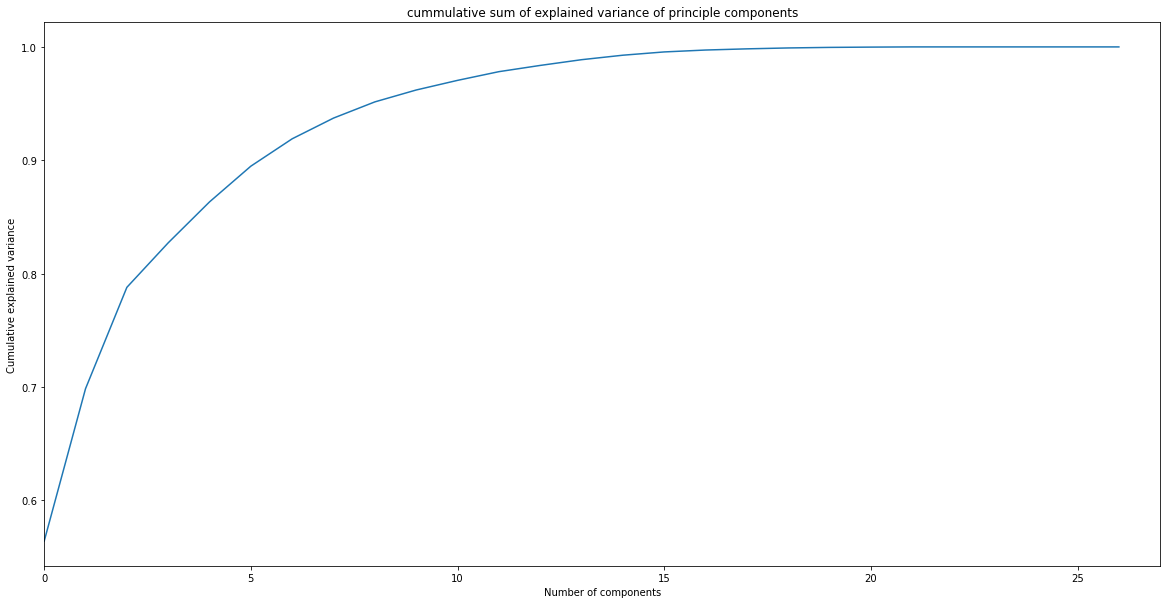

In [12]:
from sklearn.decomposition import PCA
pca = PCA().fit(imputed_DF_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,27,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

first_7 = pca.explained_variance_ratio_[0:7]
print("explained variance of first 7 pc's: "+str(np.cumsum(first_7)[6]))

plt.title('cummulative sum of explained variance of principle components')
plt.show()

We can see that 7 components explain 92% of explained variance, I could drop the rest. (But for the sake of this exercise I continue working with the whole dataset)

In [7]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=7)
Y_sklearn = sklearn_pca.fit_transform(imputed_DF_std)
print(Y_sklearn)

[[-1.84965454e+00  1.29491462e+00  2.30918978e-01 ... -1.02154904e+00
   2.08136727e-01 -2.07613540e-01]
 [ 5.74177359e-02  2.77578676e+00 -4.56259741e-01 ... -1.51655561e+00
   9.06057198e-01 -9.79583779e-01]
 [-6.68616535e-01  2.22856049e+00  1.49665262e-01 ...  1.46145411e-01
   2.95388491e-03 -1.00811586e-01]
 ...
 [ 7.04635247e+00 -4.56804195e-01 -7.24801400e-01 ... -2.79500088e-01
   7.95987389e-01 -9.55326700e-02]
 [ 7.85454751e-01  1.72235888e+00 -1.77655801e+00 ... -6.40039732e-01
  -2.50833017e-01 -1.42293775e+00]
 [-2.78855584e-01  2.56045297e+00  1.75899148e-01 ... -8.24094733e-02
  -2.31274681e-01 -1.29029972e+00]]


## Exercise 1

### a) K - Means

#### Perform K-means (library)

In [8]:
from sklearn.cluster import KMeans

kmeans_list = []

kmeans_10 = KMeans(n_clusters=10, random_state=0).fit(imputed_DF)
kmeans_10_labels = kmeans_10.labels_
kmeans_list.append((10,kmeans_10_labels))

kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(imputed_DF)
kmeans_5_labels = kmeans_5.labels_
kmeans_list.append((5,kmeans_5_labels))

kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(imputed_DF)
kmeans_2_labels = kmeans_2.labels_
kmeans_list.append((2,kmeans_2_labels))


Visualising clusters:

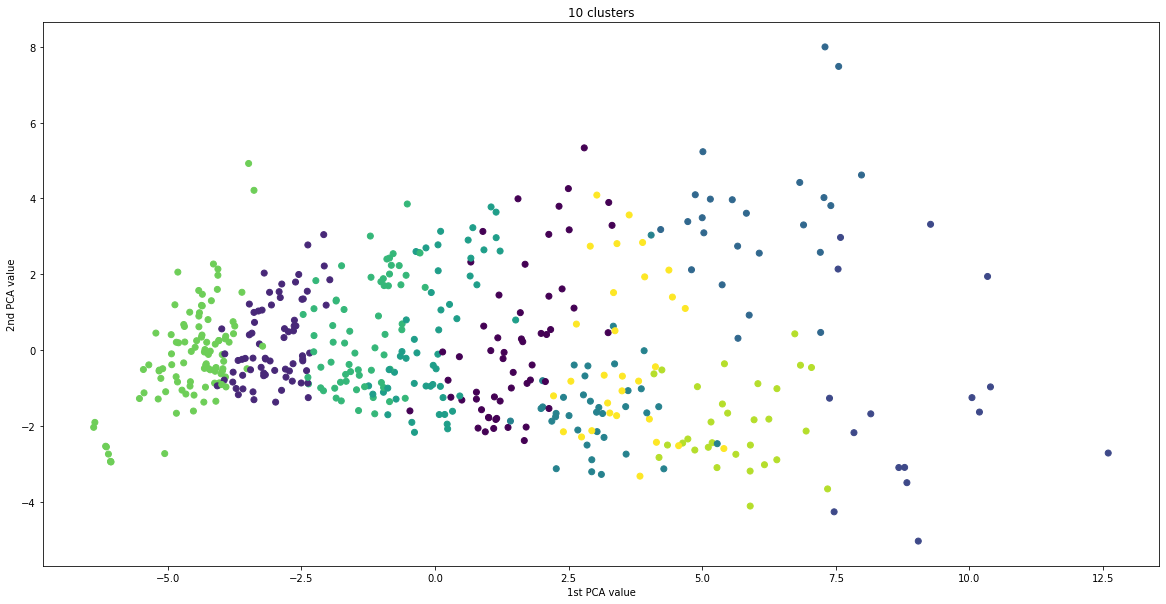

In [9]:
plt.scatter(x = Y_sklearn[:,0],y= Y_sklearn[:,1],c=kmeans_10_labels)
plt.xlabel('1st PCA value')
plt.ylabel('2nd PCA value')
plt.title('10 clusters')
plt.show()

It is clear that most clusters are spread nicely along the 1st principle component, like you would expect. Some clusters like the blue and yellow one, and the darker blue and light green one are more spread along the 2nd and other principle components.

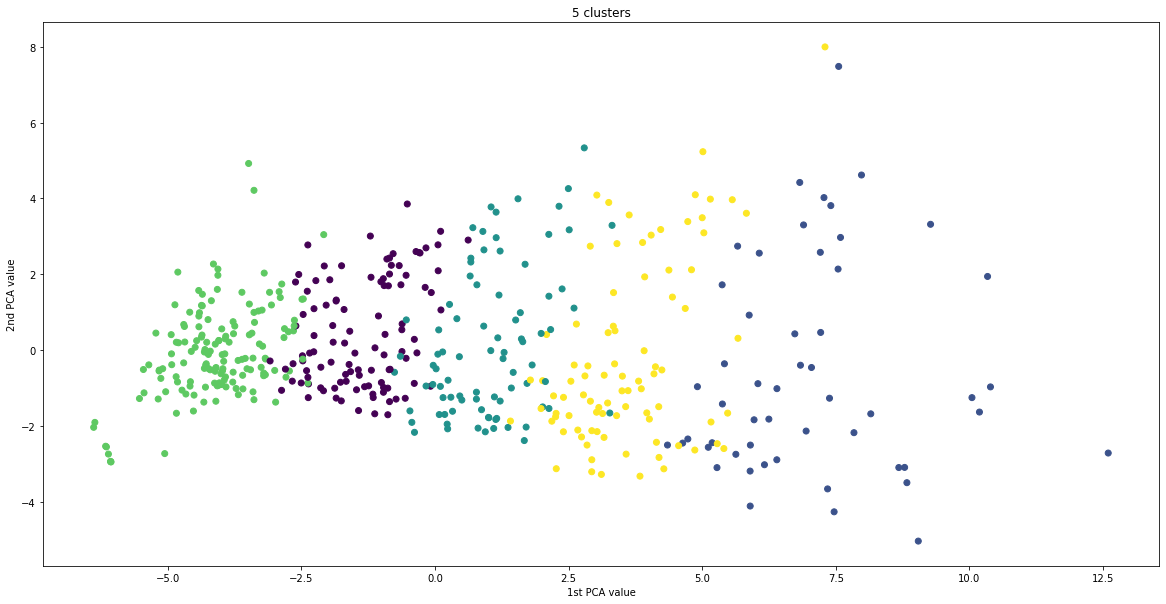

In [10]:
plt.scatter(x = Y_sklearn[:,0],y= Y_sklearn[:,1],c=kmeans_5_labels)
plt.xlabel('1st PCA value')
plt.ylabel('2nd PCA value')
plt.title('5 clusters')
plt.show()

Here it is even more clear how the clusters are spread along the 1st principle component, with a slight tilt along the 2nd principle component.

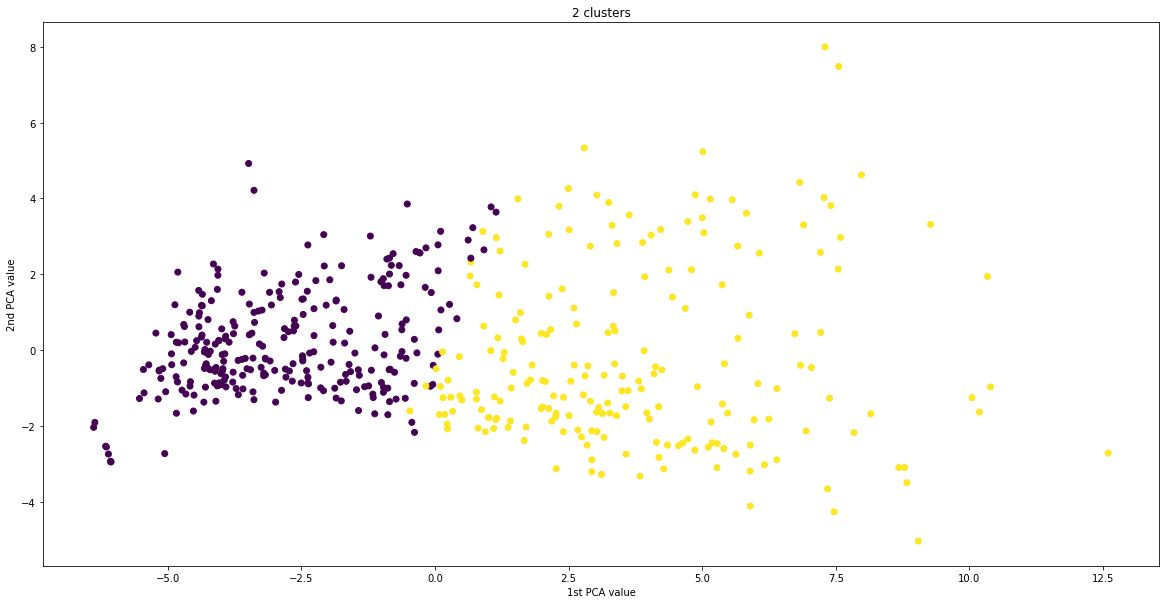

In [11]:
plt.scatter(x = Y_sklearn[:,0],y= Y_sklearn[:,1],c=kmeans_2_labels)
plt.xlabel('1st PCA value')
plt.ylabel('2nd PCA value')
plt.title('2 clusters')
plt.show()

Again, the clusters are seperated along the 1st principle component.

#### Silhouette Coefficient

In [12]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for kmeans_n_labels in kmeans_list:
    silhouette_avg = silhouette_score(imputed_DF, kmeans_n_labels[1],metric='euclidean')
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", kmeans_n_labels[0], "The average silhouette_score is :", silhouette_avg)

For n_clusters = 10 The average silhouette_score is : 0.34408069023157106
For n_clusters = 5 The average silhouette_score is : 0.4282361984268556
For n_clusters = 2 The average silhouette_score is : 0.5868772310976709


####  Calinski Harabasz

In [13]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_scores = []

for kmeans_n_labels in kmeans_list:
    calinski_harabasz_avg = calinski_harabasz_score(imputed_DF, kmeans_n_labels[1])
    calinski_harabasz_scores.append(calinski_harabasz_avg)
    print("For n_clusters =", kmeans_n_labels[0], "The average calinski_harabasz_score is :", calinski_harabasz_avg)


For n_clusters = 10 The average calinski_harabasz_score is : 781.0978060488549
For n_clusters = 5 The average calinski_harabasz_score is : 1020.3352211717881
For n_clusters = 2 The average calinski_harabasz_score is : 1109.0588162690235


#### Davies-Bouldin

In [14]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_scores = []

for kmeans_n_labels in kmeans_list:
    davies_bouldin_avg = davies_bouldin_score(imputed_DF, kmeans_n_labels[1])
    davies_bouldin_scores.append(davies_bouldin_avg)
    print("For n_clusters =", kmeans_n_labels[0], "The average davies_bouldin_score is :", davies_bouldin_avg)


For n_clusters = 10 The average davies_bouldin_score is : 1.1249870221294518
For n_clusters = 5 The average davies_bouldin_score is : 0.9441640060062946
For n_clusters = 2 The average davies_bouldin_score is : 0.5921926869779074


### b) What is an optimal K and why?

The best k, or number of clusters, seems to be 2. For the Silhouette and Calinski Harabasz, a higher score indicates better clustering and for the Davies-Bouldin, a lower score indicates better clustering, so k=2 comes out on top for all 3.

## Exercise 2

### a) hierarchical agglomerative clustering

hierarchical clustering calculates distance between clusters based on a metric, then merges the closest clusters together.

I will be using 2 libraries, sklearn and scipy, to learn how to work with both, and to double check if both have the same outcome.

#### single-linkage metric

distance between clusters = distance between closest elements in clusters

- usually produces long chain like clusters

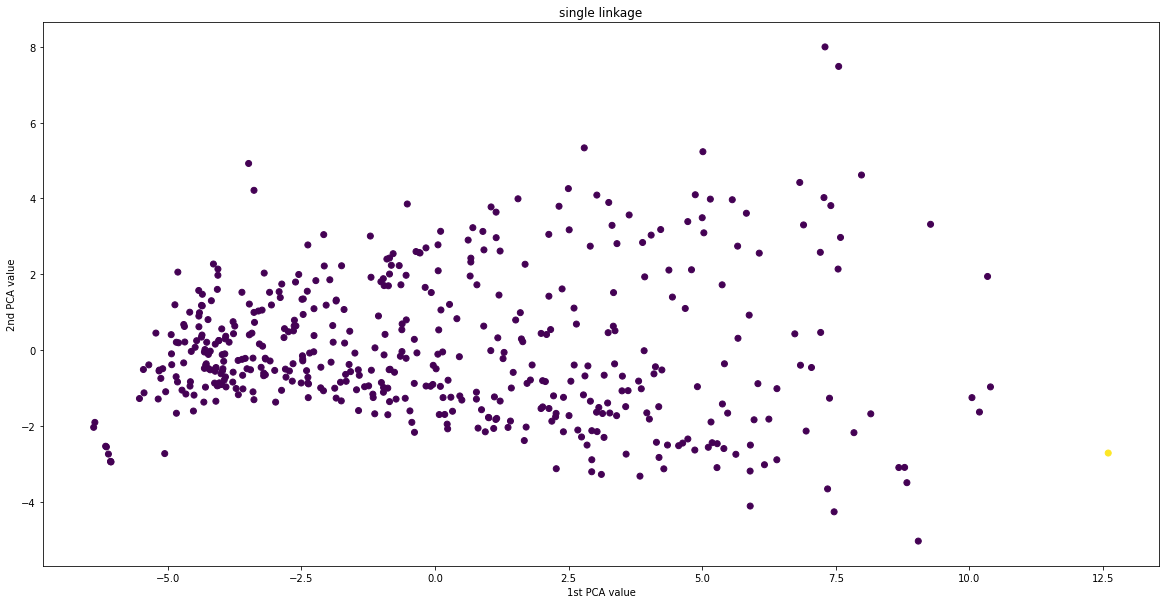

In [15]:
from sklearn.cluster import AgglomerativeClustering

hier_list = []

Agg_clustering_single = AgglomerativeClustering(linkage='single').fit(imputed_DF)
hier_list.append(('single-linkage',Agg_clustering_single.labels_))

plt.scatter(x = Y_sklearn[:,0],y= Y_sklearn[:,1],c=Agg_clustering_single.labels_)
plt.xlabel('1st PCA value')
plt.ylabel('2nd PCA value')
plt.title('single linkage')
plt.show()


In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Agg_clustering_single_2 = linkage(imputed_DF, method='single', metric='euclidean')
Agg_clustering_single_2_labels = fcluster(Agg_clustering_single_2, 2, criterion='maxclust')

for i in range(len(Agg_clustering_single_2_labels)):
    Agg_clustering_single_2_labels[i] = Agg_clustering_single_2_labels[i] - 1
    
if(Agg_clustering_single.labels_.all() == Agg_clustering_single_2_labels.all()):
    print('Double check succesful! Both libraries result in the same labels!')
else:
    print('Labels are different!')

Double check succesful! Both libraries result in the same labels!


Now let's look at another way to visualize the clustering, using a dendogram. A dendogram shows the intermediate steps while forming the clusters. Lower to the ground connections get made first, while the higher ones connect later.

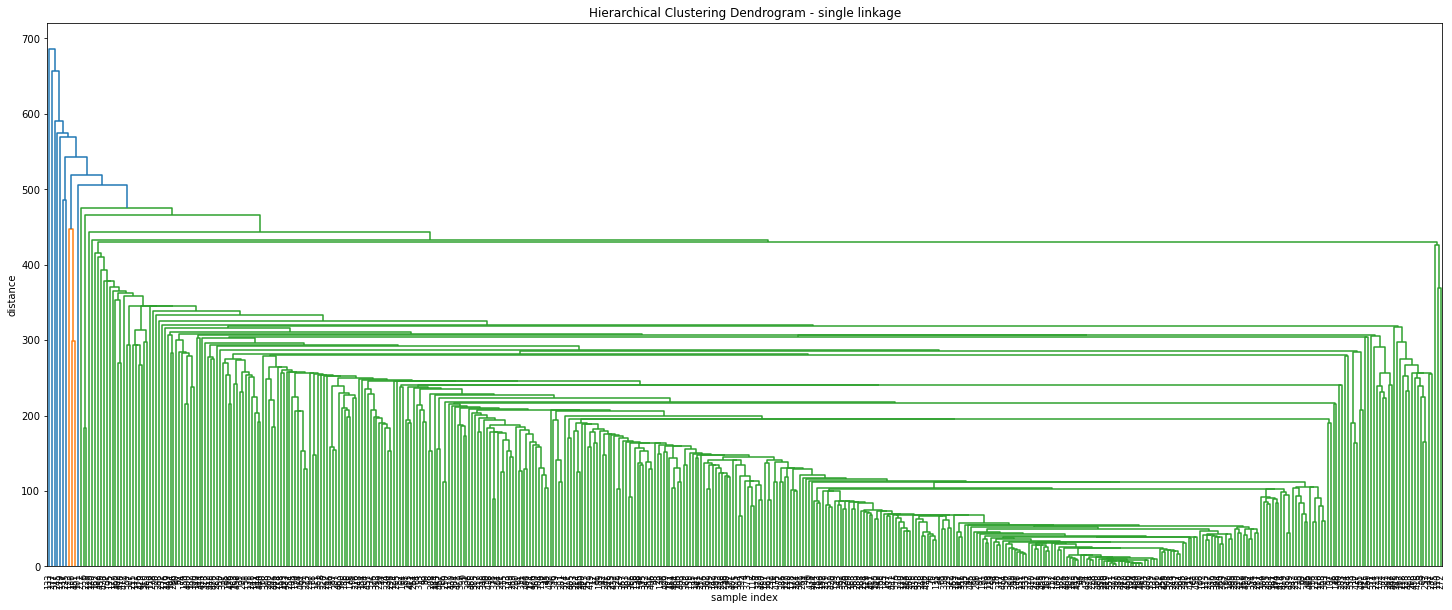

In [17]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - single linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Agg_clustering_single_2,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

#### complete-linkage metric

distance between clusters = distance between farthest elements in clusters

- produces "spherical" clusters with consistent diameter
- the opposite of single-linkage

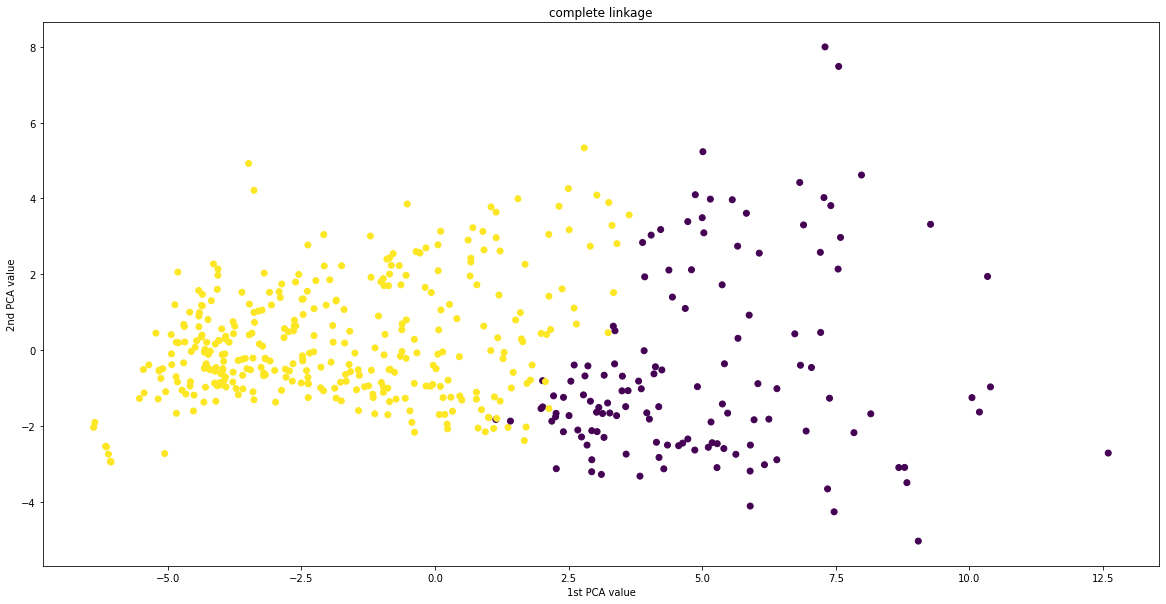

In [18]:
Agg_clustering_complete = AgglomerativeClustering(linkage='complete').fit(imputed_DF)
hier_list.append(('complete-linkage',Agg_clustering_complete.labels_))
plt.scatter(x = Y_sklearn[:,0],y= Y_sklearn[:,1],c=Agg_clustering_complete.labels_)
plt.xlabel('1st PCA value')
plt.ylabel('2nd PCA value')
plt.title('complete linkage')
plt.show()


In [19]:
Agg_clustering_complete_2 = linkage(imputed_DF, method='complete', metric='euclidean')
Agg_clustering_complete_2_labels = fcluster(Agg_clustering_complete_2, 2, criterion='maxclust')

for i in range(len(Agg_clustering_complete_2_labels)):
    Agg_clustering_complete_2_labels[i] = Agg_clustering_complete_2_labels[i] - 1
    
if(Agg_clustering_complete.labels_.all() == Agg_clustering_complete_2_labels.all()):
    print('Double check succesful! Both libraries result in the same labels!')
else:
    print('Labels are different!')

Double check succesful! Both libraries result in the same labels!


Dendogram for complete linkage:

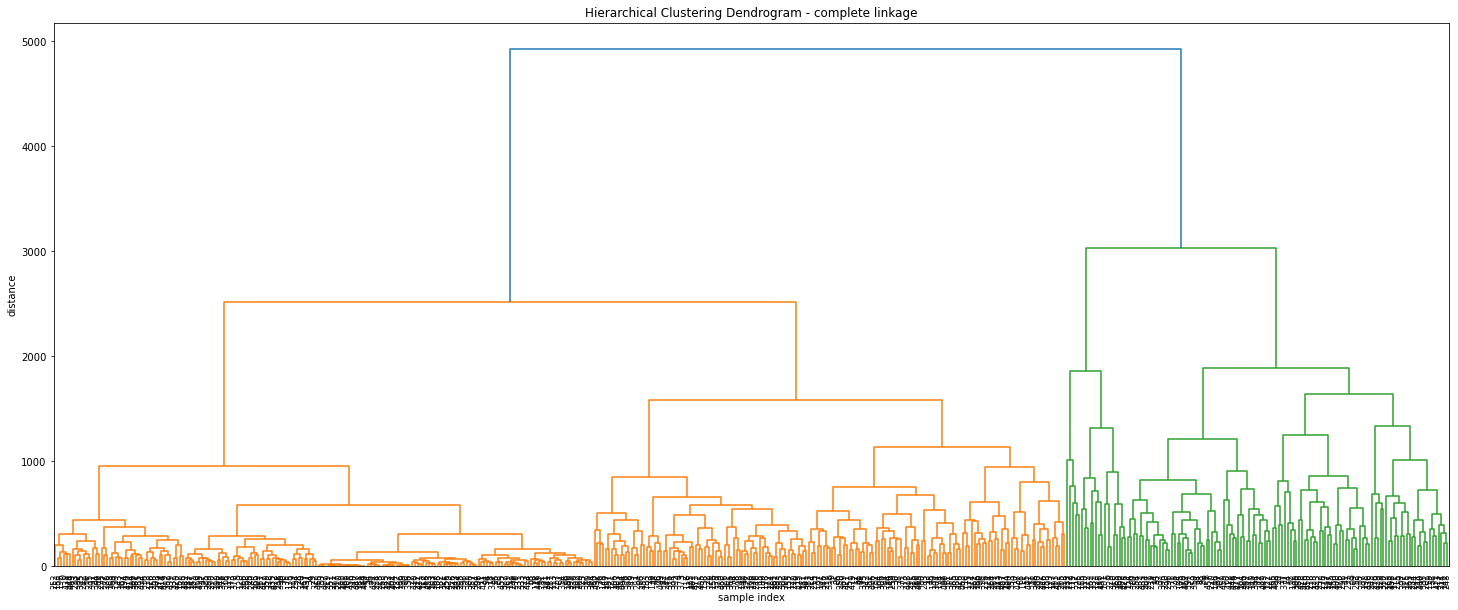

In [20]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - complete linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Agg_clustering_complete_2,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

#### average-linkage metric

distance between clusters = average of distances of elements between all elements from clusters

- somewhere in between single and complete
- less effected by outliers

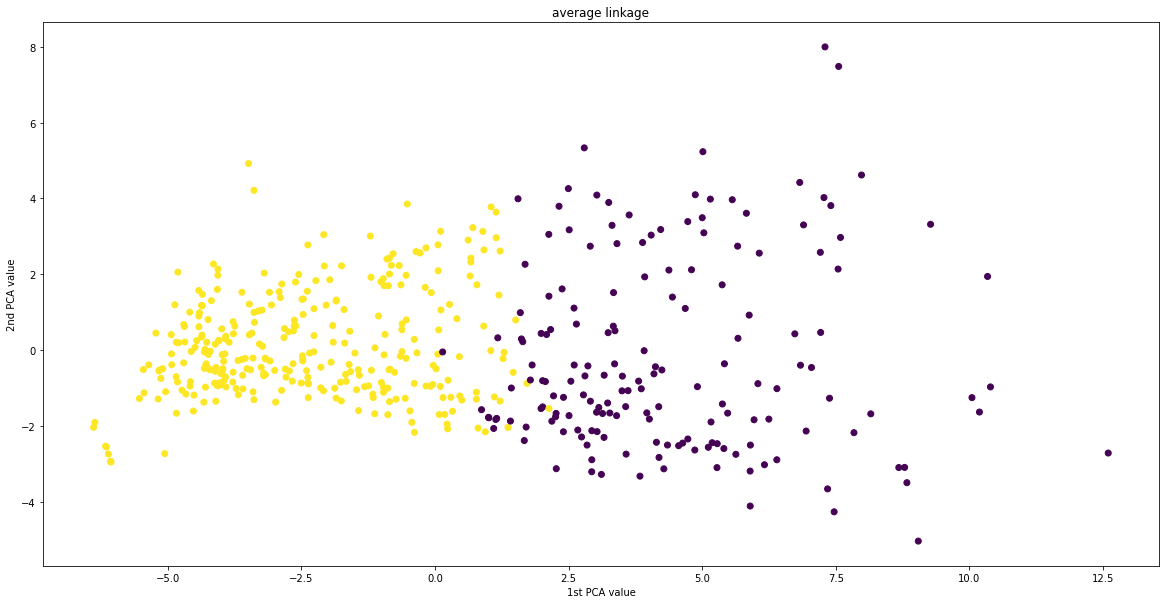

In [21]:
Agg_clustering_average = AgglomerativeClustering(linkage='average').fit(imputed_DF)
hier_list.append(('average-linkage',Agg_clustering_average.labels_))
plt.scatter(x = Y_sklearn[:,0],y= Y_sklearn[:,1],c=Agg_clustering_average.labels_)
plt.xlabel('1st PCA value')
plt.ylabel('2nd PCA value')
plt.title('average linkage')
plt.show()

In [22]:
Agg_clustering_average_2 = linkage(imputed_DF, method='average', metric='euclidean')
Agg_clustering_average_2_labels = fcluster(Agg_clustering_average_2, 2, criterion='maxclust')

for i in range(len(Agg_clustering_average_2_labels)):
    Agg_clustering_average_2_labels[i] = Agg_clustering_average_2_labels[i] - 1
    
if(Agg_clustering_average.labels_.all() == Agg_clustering_average_2_labels.all()):
    print('Double check succesful! Both libraries result in the same labels!')
else:
    print('Labels are different!')

Double check succesful! Both libraries result in the same labels!


Dendogram for average linkage:

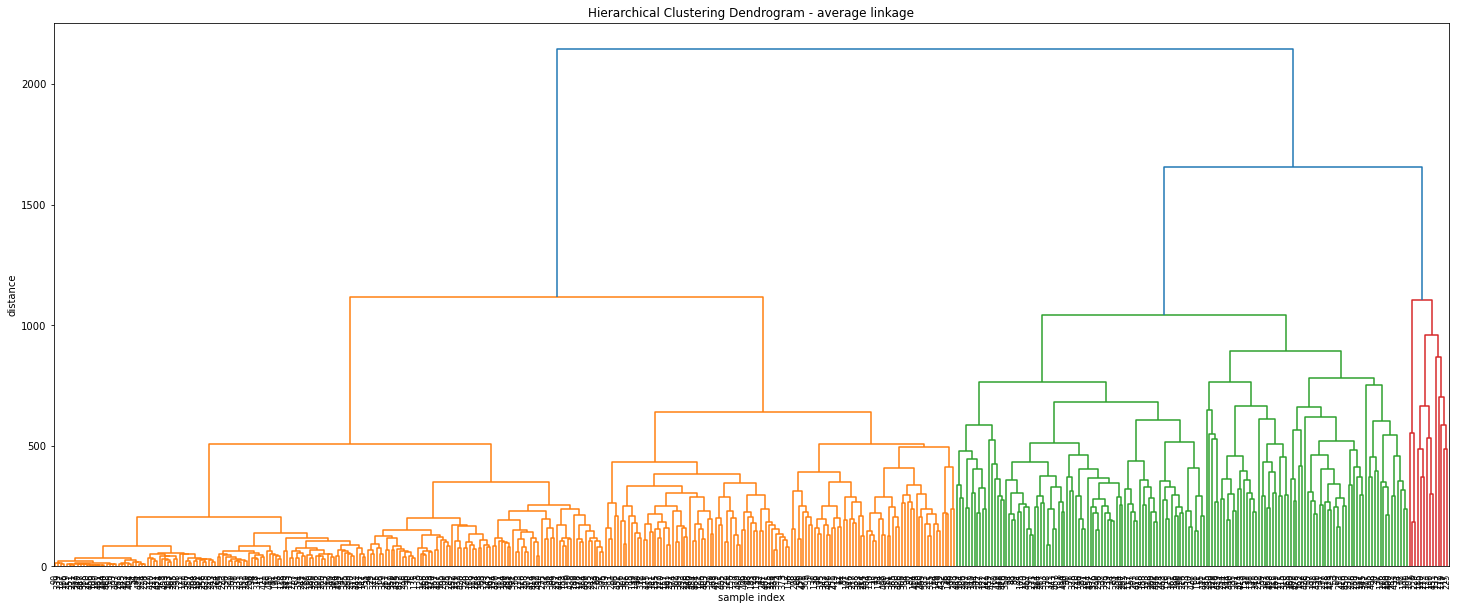

In [23]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - average linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Agg_clustering_average_2,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

#### distance of centroids metric

distance between clusters = distances of centroids of clusters

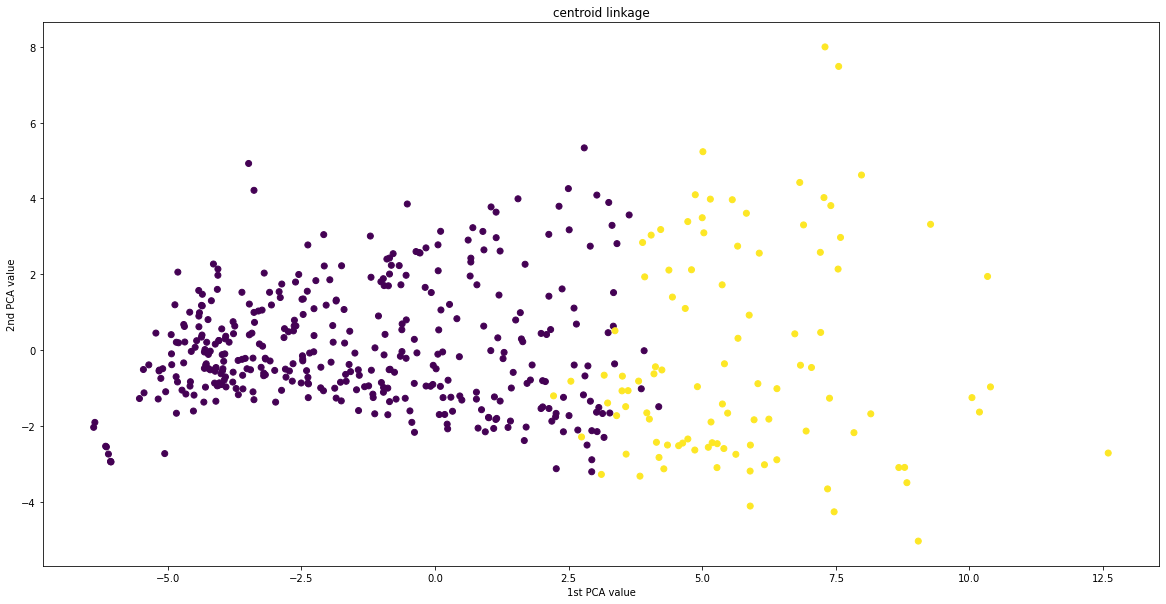

In [24]:
Agg_clustering_centroid_2 = linkage(imputed_DF, method='centroid', metric='euclidean')
Agg_clustering_centroid_2_labels = fcluster(Agg_clustering_centroid_2, 2, criterion='maxclust')

for i in range(len(Agg_clustering_centroid_2_labels)):
    Agg_clustering_centroid_2_labels[i] = Agg_clustering_centroid_2_labels[i] - 1

hier_list.append(('centroid-linkage',Agg_clustering_centroid_2_labels))

plt.scatter(x = Y_sklearn[:,0],y= Y_sklearn[:,1],c=Agg_clustering_centroid_2_labels)
plt.xlabel('1st PCA value')
plt.ylabel('2nd PCA value')
plt.title('centroid linkage')
plt.show()

(sklearn doesn't have a centroid function)

Let's take a look at the dendogram for centroid linkage:

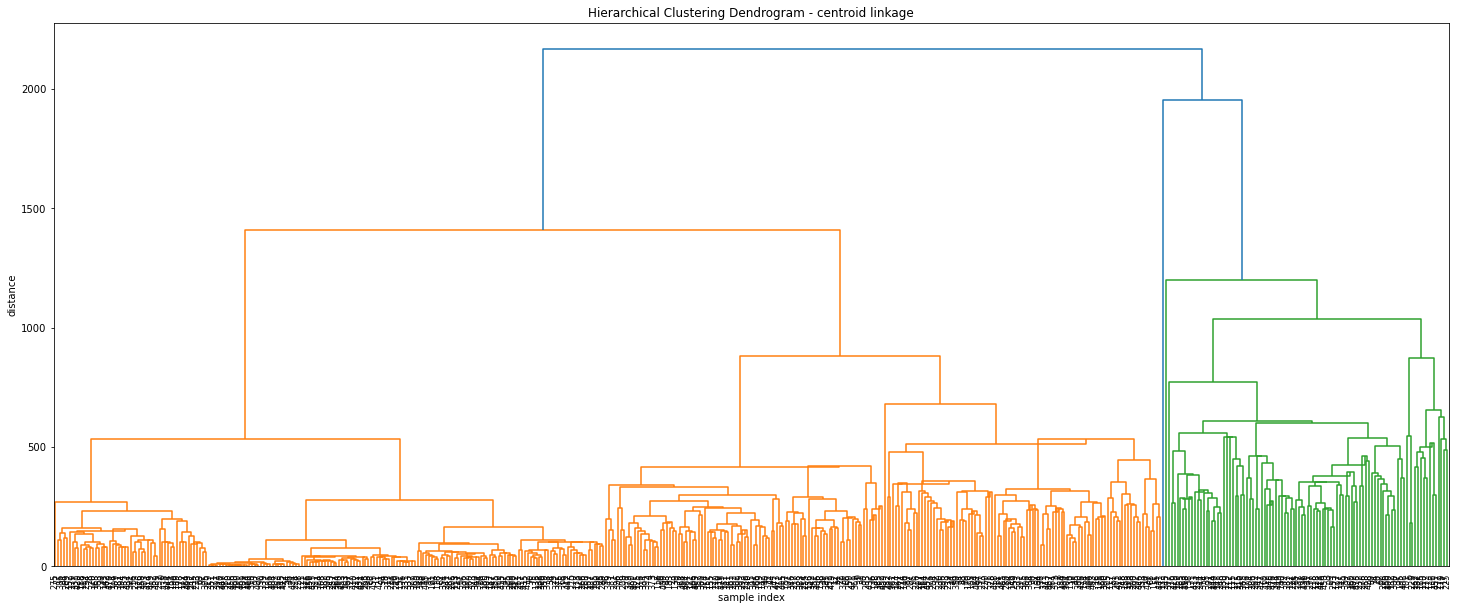

In [25]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - centroid linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Agg_clustering_centroid_2,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

### b) What is the optimal metric for this data and why?

First we can use our comon sense a bit. Single linkage puts the furthest away element in a cluster of its own, while all the other data is in the other cluster. This might tell us that the data is not clearly divided into clusters, which is also what the plot suggests. However, if we do want to seperate the data into clusters anyway, the single linkage cluster method here is is trivial, it doesn't tell us anything.

Next, let's take a look at the coefficient scores we explored in the previous question:

In [26]:
print("===== Silhouette ======")
silhouette_scores = []

for hier_linkage in hier_list:
    silhouette_avg = silhouette_score(imputed_DF, hier_linkage[1],metric='euclidean')
    silhouette_scores.append(silhouette_avg)
    print("For linkage method =", hier_linkage[0], "The average silhouette_score is :", silhouette_avg)
print(' ')

print("===== Calinski Harabasz ======")
calinski_harabasz_scores = []

for hier_linkage in hier_list:
    calinski_harabasz_avg = calinski_harabasz_score(imputed_DF, hier_linkage[1])
    calinski_harabasz_scores.append(calinski_harabasz_avg)
    print("For linkage method =", hier_linkage[0], "The average calinski_harabasz_score is :", calinski_harabasz_avg)    
print(' ')

print("===== Davies Bouldin ======")
davies_bouldin_scores = []

for hier_linkage in hier_list:
    davies_bouldin_avg = davies_bouldin_score(imputed_DF, hier_linkage[1])
    davies_bouldin_scores.append(davies_bouldin_avg)
    print("For linkage method =", hier_linkage[0], "The average davies_bouldin_score is :", davies_bouldin_avg)

===== Silhouette ======
For linkage method = single-linkage The average silhouette_score is : 0.5387047414215854
For linkage method = complete-linkage The average silhouette_score is : 0.5381857672949842
For linkage method = average-linkage The average silhouette_score is : 0.5737324634217631
For linkage method = centroid-linkage The average silhouette_score is : 0.4956926180091648
 
===== Calinski Harabasz ======
For linkage method = single-linkage The average calinski_harabasz_score is : 8.740864414333856
For linkage method = complete-linkage The average calinski_harabasz_score is : 784.3917060980109
For linkage method = average-linkage The average calinski_harabasz_score is : 1021.2310989193302
For linkage method = centroid-linkage The average calinski_harabasz_score is : 548.2008720754897
 
===== Davies Bouldin ======
For linkage method = single-linkage The average davies_bouldin_score is : 0.2985666818006726
For linkage method = complete-linkage The average davies_bouldin_score is

At first glance, there are a couple take aways here:
- average-linkage has the highest average Silhouette coefficient, the highest average Calinski Harabasz coefficient, and also the second lowest Davies Bouldin coefficient, this indicates that average-linkage is a very strong contender for the being the best linkage method in this case.
- single-linkage has an exeptionally low Calinski Harabasz coefficient. This is because like I said before, single linkage solo's out 1 element and puts all the others in the other cluster. This is heavily punished by the Calinski Harabasz coefficient, since the within cluster variance of the large cluster will be extremely large compared to the other linkage methods.
- single-linkage has the lowest (and thus best) average Davies Bouldin coefficient, because the within cluster scatter for the 1-point cluster is 0, and the distance between clusters is quite big. However, like I said before, single-linkage is in this case pretty redundant, since it solo's out 1 data point. If we were to compare the remaining linkage methods in relation to their average Davies Bouldin coefficient, average linkage would again come out on top.

We can conclude that average-linkage is in this case the best method. 

## Exercise 3

#### shuffle data

In [27]:
import random

Data_array = imputed_DF.to_numpy()

print('data before shuffling:')
print(Data_array[0:5])

for i in range(len(imputed_DF)-1,0,-1):
    j = random.randrange(0,i,1)
   #print(i,j)
   #print('before:')
   #print(Data_array[i])
   #print(Data_array[j])
    Data_array[[i,j]] = Data_array[[j,i]]
   #print('after:')
   #print(Data_array[i])
   #print(Data_array[j])

print(' ')
print('data after shuffling:')
print(Data_array[0:5])
    
shuffled_DF = pd.DataFrame(Data_array, columns=imputed_DF.columns)

shuffled_DF

data before shuffling:
[[2.30000000e+01 6.30000000e+01 0.00000000e+00 8.47000000e+02
  6.60000000e+01 1.41000000e+02 4.68000000e-01 4.00000000e+00
  1.50000000e+01 2.66666667e-01 6.20000000e+01 1.26000000e+02
  4.92063492e-01 4.82000000e-01 3.50000000e+01 5.30000000e+01
  6.60000000e-01 7.20000000e+01 1.44000000e+02 2.16000000e+02
  2.80000000e+01 2.30000000e+01 2.60000000e+01 3.00000000e+01
  1.22000000e+02 1.71000000e+02 2.01300000e+03]
 [2.00000000e+01 8.10000000e+01 2.00000000e+01 1.19700000e+03
  9.30000000e+01 1.85000000e+02 5.03000000e-01 0.00000000e+00
  0.00000000e+00 9.86074690e-02 9.30000000e+01 1.85000000e+02
  5.02702703e-01 5.03000000e-01 7.90000000e+01 1.36000000e+02
  5.81000000e-01 1.42000000e+02 1.90000000e+02 3.32000000e+02
  4.30000000e+01 4.00000000e+01 5.70000000e+01 7.10000000e+01
  2.03000000e+02 2.65000000e+02 2.01300000e+03]
 [2.70000000e+01 5.30000000e+01 1.20000000e+01 9.61000000e+02
  1.43000000e+02 2.75000000e+02 5.20000000e-01 0.00000000e+00
  0.00000000e

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,37.0,81.0,0.0,1973.0,330.0,811.0,0.407,146.0,371.0,0.393531,...,67.0,217.0,284.0,212.0,61.0,35.0,108.0,209.0,967.0,2013.0
1,20.0,62.0,62.0,1502.0,167.0,353.0,0.473,1.0,9.0,0.111111,...,109.0,215.0,324.0,52.0,43.0,39.0,60.0,145.0,448.0,2013.0
2,23.0,45.0,7.0,723.0,73.0,166.0,0.440,25.0,77.0,0.324675,...,9.0,43.0,52.0,43.0,24.0,9.0,22.0,88.0,200.0,2013.0
3,20.0,22.0,1.0,156.0,12.0,35.0,0.343,4.0,19.0,0.210526,...,0.0,16.0,16.0,6.0,3.0,1.0,11.0,22.0,37.0,2013.0
4,35.0,76.0,76.0,2409.0,341.0,708.0,0.482,58.0,162.0,0.358025,...,132.0,365.0,497.0,124.0,90.0,37.0,95.0,125.0,791.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,27.0,51.0,17.0,675.0,73.0,190.0,0.384,31.0,102.0,0.303922,...,18.0,69.0,87.0,68.0,19.0,5.0,34.0,81.0,202.0,2013.0
477,27.0,81.0,81.0,2409.0,331.0,754.0,0.439,2.0,5.0,0.400000,...,202.0,336.0,538.0,91.0,29.0,182.0,148.0,269.0,871.0,2013.0
478,25.0,82.0,36.0,2337.0,269.0,602.0,0.447,94.0,246.0,0.382114,...,116.0,187.0,303.0,75.0,61.0,38.0,79.0,211.0,784.0,2013.0
479,29.0,2.0,0.0,10.0,2.0,5.0,0.400,1.0,2.0,0.500000,...,0.0,3.0,3.0,0.0,1.0,0.0,3.0,1.0,5.0,2013.0


Making sure that the original data stays the same:

In [28]:
imputed_DF = pd.DataFrame(imp_mean.fit_transform(data_num))
imputed_DF.columns = data_num.columns
imputed_DF.index = data_num.index

From printing we can see that the rows did indeed change, the first data point used to be Quincy Acy age 23, now the 1st element has age 21. Another check to see if we shuffled properly, is to compute the sum of the columns before and after shuffling, and checking if they are the same:

In [29]:
column_sum = imputed_DF.sum(0)
print(column_sum)

column_sum_2 = shuffled_DF.sum(0)
print(column_sum_2)

age            12751.000000
g              25615.000000
gs             12300.000000
mp            595183.000000
fg             92776.000000
fga           204167.000000
fg.              209.918364
x3p            19054.000000
x3pa           52973.000000
x3p.             129.604811
x2p            73722.000000
x2pa          151194.000000
x2p.             224.690570
efg.             231.230817
ft             43870.000000
fta            58029.000000
ft.              346.143806
orb            26845.000000
drb            78315.000000
trb           105160.000000
ast            54130.000000
stl            18894.000000
blk            11594.000000
tov            34566.000000
pf             50923.000000
pts           248476.000000
season_end    968253.000000
dtype: float64
age            12751.000000
g              25615.000000
gs             12300.000000
mp            595183.000000
fg             92776.000000
fga           204167.000000
fg.              209.918364
x3p            19054.000000
x3pa 

Looks like they are the same!

Now we can check how shuffling impacts the hierarchical clustering.

#### single-linkage

In [30]:
from sklearn.cluster import AgglomerativeClustering

hier_list_SF = []

Agg_clustering_single_SF = AgglomerativeClustering(linkage='single').fit(shuffled_DF)
hier_list_SF.append(('single-linkage',Agg_clustering_single_SF.labels_))


In [31]:
if(Agg_clustering_single.labels_.all() == Agg_clustering_single_SF.labels_.all()):
    print('Shuffling did not change the lables.')
else:
    print('Labels are different!')

Shuffling did not change the lables.


#### complete-linkage

In [32]:
Agg_clustering_complete_SF = AgglomerativeClustering(linkage='complete').fit(shuffled_DF)
hier_list_SF.append(('complete-linkage',Agg_clustering_complete_SF.labels_))

In [33]:
if(Agg_clustering_complete.labels_.all() == Agg_clustering_complete_SF.labels_.all()):
    print('Shuffling did not change the lables.')
else:
    print('Labels are different!')

Shuffling did not change the lables.


#### average-linkage

In [34]:
Agg_clustering_average_SF = AgglomerativeClustering(linkage='average').fit(shuffled_DF)
hier_list_SF.append(('average-linkage',Agg_clustering_average_SF.labels_))

In [35]:
if(Agg_clustering_average.labels_.all() == Agg_clustering_average_SF.labels_.all()):
    print('Shuffling did not change the lables.')
else:
    print('Labels are different!')

Shuffling did not change the lables.


#### centroid-linkage

In [36]:
Agg_clustering_centroid_2_SF = linkage(shuffled_DF, method='centroid', metric='euclidean')
Agg_clustering_centroid_2_SF_labels = fcluster(Agg_clustering_centroid_2_SF, 2, criterion='maxclust')

for i in range(len(Agg_clustering_centroid_2_labels)):
    Agg_clustering_centroid_2_SF_labels[i] = Agg_clustering_centroid_2_SF_labels[i] - 1

hier_list_SF.append(('centroid-linkage',Agg_clustering_centroid_2_SF_labels))

In [37]:
if(Agg_clustering_centroid_2_labels.all() == Agg_clustering_centroid_2_SF_labels.all()):
    print('Shuffling did not change the lables.')
else:
    print('Labels are different!')

Shuffling did not change the lables.


#### Since non of the labels changed ofcourse I won't see any difference in the coefficients:

In [38]:
print("===== Silhouette ======")
silhouette_scores_SF = []

print('before shuffle:')
print(silhouette_scores)

print(' ')
print('after shuffle:')
for hier_linkage in hier_list_SF:
    silhouette_avg = silhouette_score(shuffled_DF, hier_linkage[1],metric='euclidean')
    silhouette_scores_SF.append(silhouette_avg)
    print("For linkage method =", hier_linkage[0], "The average silhouette_score is :", silhouette_avg)
print(' ')

print("===== Calinski Harabasz ======")
calinski_harabasz_scores_SF = []

print('before shuffle:')
print(calinski_harabasz_scores)

print(' ')
print('after shuffle:')
for hier_linkage in hier_list_SF:
    calinski_harabasz_avg = calinski_harabasz_score(shuffled_DF, hier_linkage[1])
    calinski_harabasz_scores_SF.append(calinski_harabasz_avg)
    print("For linkage method =", hier_linkage[0], "The average calinski_harabasz_score is :", calinski_harabasz_avg)    
print(' ')

print("===== Davies Bouldin ======")
davies_bouldin_scores_SF = []

print('before shuffle:')
print(davies_bouldin_scores)

print(' ')
print('after shuffle:')
for hier_linkage in hier_list_SF:
    davies_bouldin_avg = davies_bouldin_score(shuffled_DF, hier_linkage[1])
    davies_bouldin_scores_SF.append(davies_bouldin_avg)
    print("For linkage method =", hier_linkage[0], "The average davies_bouldin_score is :", davies_bouldin_avg)

===== Silhouette ======
before shuffle:
[0.5387047414215854, 0.5381857672949842, 0.5737324634217631, 0.4956926180091648]
 
after shuffle:
For linkage method = single-linkage The average silhouette_score is : 0.5387047414215854
For linkage method = complete-linkage The average silhouette_score is : 0.5381857672949842
For linkage method = average-linkage The average silhouette_score is : 0.5737324634217631
For linkage method = centroid-linkage The average silhouette_score is : 0.4956926180091648
 
===== Calinski Harabasz ======
before shuffle:
[8.740864414333856, 784.3917060980109, 1021.2310989193302, 548.2008720754897]
 
after shuffle:
For linkage method = single-linkage The average calinski_harabasz_score is : 8.740864414333856
For linkage method = complete-linkage The average calinski_harabasz_score is : 784.391706098011
For linkage method = average-linkage The average calinski_harabasz_score is : 1021.2310989193302
For linkage method = centroid-linkage The average calinski_harabasz_s

#### Should shuffeling have changed the labels?

I would expect shuffling to change the labels in the case where there are equal distances between points, since in that case perhaps it might connect the 2 first clusters it sees, and this might cascade further and you could end up with different clusters. However, since we have a 27 dimensional dataset, with a lot of completely different numbers, and the distance between 2 points is a combination of all those numbers, it seems very unlikely to me that the distance between 2 points would be exactly the same. This is why I think that the order of the rows in this case does not have an impact.

## Exercise 4

## create Data

In [39]:
cow_indexes = ['Clover','Sunny','Rose','Daisy','Strawberry','Molly']
cow_columns = ['race','age','milk/d','character','music']
cow_data = [['Holstein',2,20,'lively','rock'],['Ayrshire',2,10,'kind','rock'],['Holstein',5,15,'calm','country'],['Ayrshire',4,25,'calm','classical'],['Finncattle',7,35,'calm','classical'],['Ayrshire',8,45,'kind','country']]

cow_DF = pd.DataFrame(data=cow_data,index=cow_indexes,columns=cow_columns)
cow_DF

,race,age,milk/d,character,music
Clover,Holstein,2,20,lively,rock
Sunny,Ayrshire,2,10,kind,rock
Rose,Holstein,5,15,calm,country
Daisy,Ayrshire,4,25,calm,classical
Strawberry,Finncattle,7,35,calm,classical
Molly,Ayrshire,8,45,kind,country


### a) Pairwise distance using only numerical features

#### Scaling + analyzing

Covariance matrix: 
[[1.2        1.02942929]
 [1.02942929 1.2       ]]
Eigenvectors 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvalues 
[2.22942929 0.17057071]


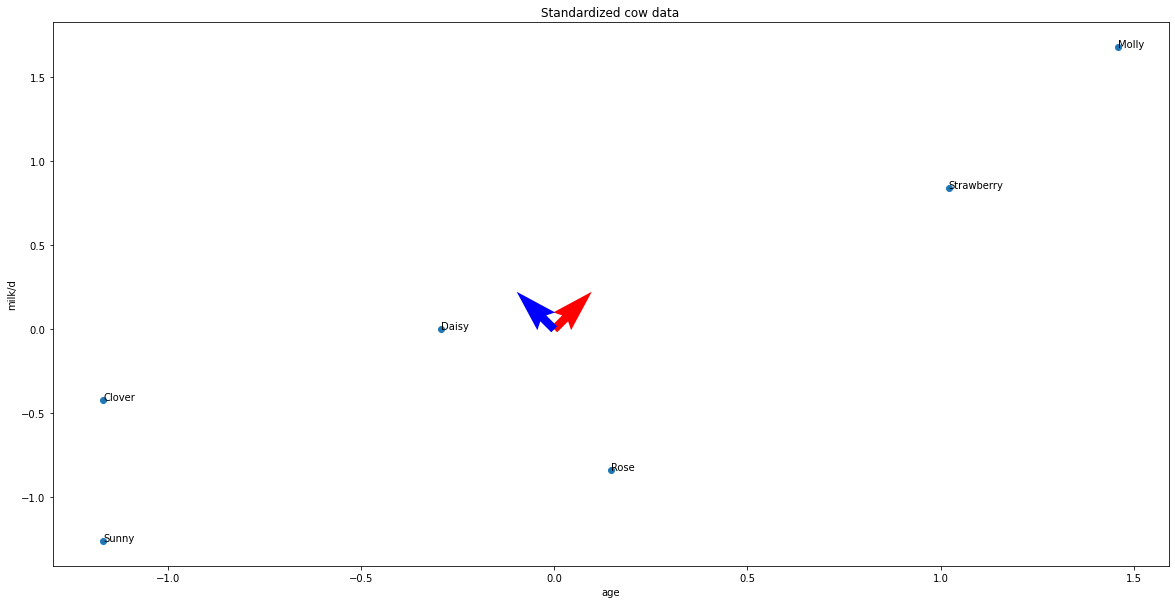

In [40]:
cow_DF_num = cow_DF.select_dtypes(['number'])

cow_data_num_std = StandardScaler().fit_transform(cow_DF_num)

cov_mat = np.cov(cow_data_num_std.T)
print('Covariance matrix: \n%s' %cov_mat)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

origin = [0, 0]

eig_vec1 = eig_vecs[:,0]
eig_vec2 = eig_vecs[:,1]

x_plt = cow_data_num_std[:,0]
y_plt = cow_data_num_std[:,1]

fig, ax = plt.subplots()
ax.scatter(x = x_plt,y= y_plt)
plt.quiver(*origin, *eig_vec1, color=['r'], scale=21)
plt.quiver(*origin, *eig_vec2, color=['b'], scale=21)
plt.xlabel('age')
plt.ylabel('milk/d')
plt.title('Standardized cow data')

for i, txt in enumerate(cow_indexes):
    ax.annotate(txt, (x_plt[i], y_plt[i]))

There seems to be a linear correlation between the age of the cow and the milk it produces per day.

#### Distance calculation

In [41]:
cov_mat_inv = np.linalg.inv(cov_mat)

D_i_j = []
i=0
j=0
for n in cow_DF.index:
    j = 0
    for m in cow_DF.index:
        if(j>i):
            Maha = np.sqrt(np.matmul(np.matmul((cow_data_num_std[i]-cow_data_num_std[j]),cov_mat_inv),(cow_data_num_std[i]-cow_data_num_std[j])))
            D_i_j.append((i,j,Maha))
        j = j+1
    i= i+1

print(D_i_j)
D_matrix = [ [0] * 6 for _ in range(6)]
for e in D_i_j:
    D_matrix[int(e[0])][int(e[1])]=e[2]
    D_matrix[int(e[1])][int(e[0])]=e[2]

Maha_DF = pd.DataFrame(data=D_matrix,index=cow_indexes,columns=cow_indexes)
Maha_DF

[(0, 1, 1.4924771863109902), (0, 2, 2.996838776782702), (0, 3, 0.9916714790064712), (0, 4, 2.278063532853209), (0, 5, 2.4119567875531467), (1, 2, 1.7347849068359407), (1, 3, 1.2072058530192693), (1, 4, 2.036398642525481), (1, 5, 2.690601511352247), (2, 3, 2.1959678689627022), (2, 4, 1.8343742556939158), (2, 5, 2.751561383540873), (3, 4, 1.3016577108474143), (3, 5, 1.6291189140203846), (4, 5, 0.9171871278469578)]


,Clover,Sunny,Rose,Daisy,Strawberry,Molly
Clover,0.000000,1.492477,2.996839,0.991671,2.278064,2.411957
Sunny,1.492477,0.000000,1.734785,1.207206,2.036399,2.690602
Rose,2.996839,1.734785,0.000000,2.195968,1.834374,2.751561
Daisy,0.991671,1.207206,2.195968,0.000000,1.301658,1.629119
Strawberry,2.278064,2.036399,1.834374,1.301658,0.000000,0.917187
Molly,2.411957,2.690602,2.751561,1.629119,0.917187,0.000000


##### validity check: compute mahalanobis distance using library

In [42]:
from scipy.spatial import distance

check_i_j = []
i=0
j=0
for n in cow_DF.index:
    j = 0
    for m in cow_DF.index:
        if(j>i):
            Maha = distance.mahalanobis(cow_data_num_std[i], cow_data_num_std[j], cov_mat_inv)
            check_i_j.append((i,j,Maha))
        j = j+1
    i= i+1
    
print('check_i_j:')
print(check_i_j)

check_i_j:
[(0, 1, 1.4924771863109902), (0, 2, 2.996838776782702), (0, 3, 0.9916714790064712), (0, 4, 2.278063532853209), (0, 5, 2.4119567875531467), (1, 2, 1.7347849068359407), (1, 3, 1.2072058530192693), (1, 4, 2.036398642525481), (1, 5, 2.690601511352247), (2, 3, 2.1959678689627022), (2, 4, 1.8343742556939158), (2, 5, 2.751561383540873), (3, 4, 1.3016577108474143), (3, 5, 1.6291189140203846), (4, 5, 0.9171871278469578)]


Check passed, they are the same!

#### change numerical from distance to similarity

In [43]:
D_max = np.max(D_matrix)
S_matrix_num = [ [0] * 6 for _ in range(6)]

for i in range(len(D_matrix)):
    for j in range(len(D_matrix)):
        S_matrix_num[i][j] = (D_max - D_matrix[i][j])/D_max
        
print(S_matrix_num)

[[1.0, 0.5019828234092526, 0.0, 0.6690941512472374, 0.2398444819581333, 0.1951663178415836], [0.5019828234092526, 1.0, 0.4211283835901432, 0.5971735742436962, 0.32048441901446395, 0.10218676687012858], [0.0, 0.4211283835901432, 1.0, 0.2672385695301854, 0.38789691660916314, 0.08184537491374495], [0.6690941512472374, 0.5971735742436962, 0.2672385695301854, 1.0, 0.5656564107046068, 0.4563875352115712], [0.2398444819581333, 0.32048441901446395, 0.38789691660916314, 0.5656564107046068, 1.0, 0.6939484583045816], [0.1951663178415836, 0.10218676687012858, 0.08184537491374495, 0.4563875352115712, 0.6939484583045816, 1.0]]


#### Similarity Matrix

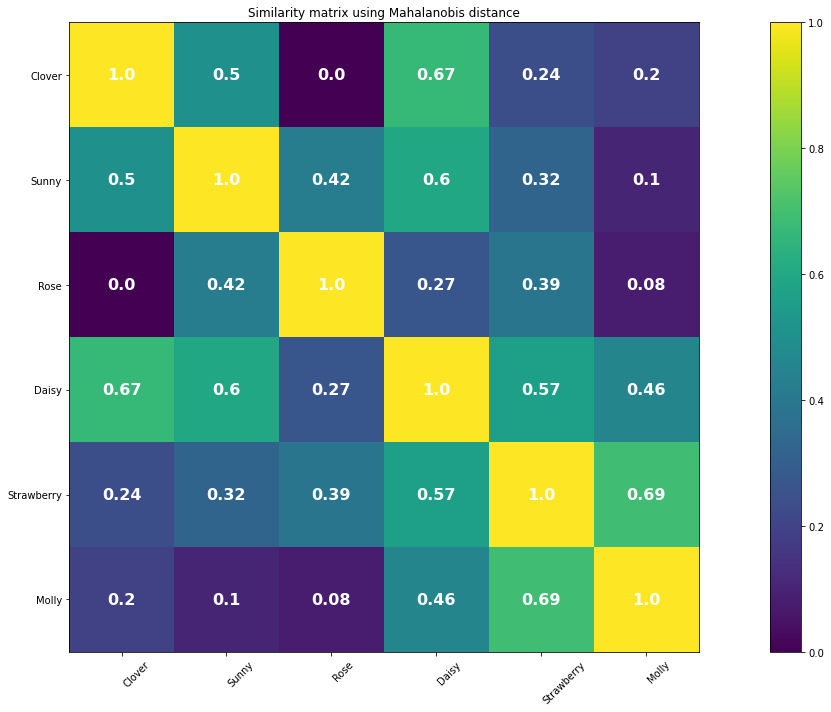

In [44]:
fig, ax = plt.subplots()
im = ax.imshow(S_matrix_num,cmap='viridis')


ax.set_xticks(np.arange(len(cow_indexes)))
ax.set_yticks(np.arange(len(cow_indexes)))

ax.set_xticklabels(cow_indexes)
ax.set_yticklabels(cow_indexes)

plt.setp(ax.get_xticklabels(), rotation=45, ha="left")

for i in range(len(cow_indexes)):
    for j in range(len(cow_indexes)):
        text = ax.text(j, i, round(S_matrix_num[i][j],2),
                       ha="center", va="center", color="w",weight = 'bold',size=16)

ax.set_title("Similarity matrix using Mahalanobis distance")
fig.tight_layout()
plt.colorbar(im)
plt.show()



As expected, cows that are similar in age and have similar milk production per day have a lower distance score, and thus a higher similarity score. One thing to notice, when we look at the scatter plot, we could see that Sunny and Clover are the closest out of all cows. However, when we look in the matrix we notice that Clover is actually closer to Daisy than to Sunny. This is explained by the fact that Clover and Daisy are more spread on the axis that has more variance, the 1st principle component. Clover and Sunny are spread vertically, much less along the 1st principle component axis. The Mahalanobis distance takes into account this variance and puts more weight on differences along axises that have less variance.  

### b) Pairwise distance using only categorical features

#### Calculate probabilities

In [45]:
cow_DF_cat = cow_DF.select_dtypes(exclude = ['number'])
cow_DF_cat

n_Holstein = 0
n_Ayrshire = 0
n_Finncattle = 0

n_lively = 0
n_kind = 0
n_calm = 0

n_rock = 0
n_country = 0
n_classical = 0

n_mistake = 0

for index,cow in cow_DF_cat.iterrows():
    if(cow['race']=='Holstein'):
        n_Holstein = n_Holstein +1
    elif(cow['race']=='Ayrshire'):
        n_Ayrshire = n_Ayrshire + 1
    elif(cow['race']=='Finncattle'):
        n_Finncattle = n_Finncattle +1
    else:
        n_mistake = n_mistake + 1
    
    if(cow['character']=='lively'):
        n_lively = n_lively +1
    elif(cow['character']=='kind'):
        n_kind = n_kind + 1
    elif(cow['character']=='calm'):
        n_calm = n_calm +1
    else:
        n_mistake = n_mistake + 1
        
    if(cow['music']=='rock'):
        n_rock = n_rock +1
    elif(cow['music']=='country'):
        n_country = n_country + 1
    elif(cow['music']=='classical'):
        n_classical = n_classical +1
    else:
        n_mistake = n_mistake + 1

n_races = n_Holstein + n_Ayrshire + n_Finncattle
n_characters = n_lively + n_kind + n_calm
n_musics = n_rock + n_country + n_classical

p_Holstein = n_Holstein/n_races
p_Ayrshire = n_Ayrshire/n_races
p_Finncattle = n_Finncattle/n_races

p_lively = n_lively/n_characters
p_kind = n_kind/n_characters
p_calm = n_calm/n_characters

p_rock = n_rock/n_musics
p_country = n_country/n_musics
p_classical = n_classical/n_musics

#### Calculate Goodall + overlap distances

In [46]:
Goodall_i_j = []
overlap_i_j = []
n=0

for i,cow_1 in cow_DF_cat.iterrows():
    m=0
    for j,cow_2 in cow_DF_cat.iterrows():
        if(m>=n):
            Goodall = 0
            overlap = 0
            if(cow_1['race']=='Holstein' and cow_2['race']=='Holstein'):
                #print('Holstein')
                #print(i,j)
                Goodall =Goodall + ((1 - p_Holstein**2))/3
                overlap = overlap + 1/3
                #print(Goodall)
            if(cow_1['race']=='Ayrshire' and cow_2['race']=='Ayrshire'):
                #print('Ayrshire')
                #print(i,j)
                Goodall =Goodall + ((1 - p_Ayrshire**2))/3
                overlap = overlap + 1/3
                #print(Goodall)
            if(cow_1['race']=='Finncattle' and cow_2['race']=='Finncattle'):
                #print('Finncattle')
                #print(i,j)
                Goodall =Goodall + ((1 - p_Finncattle**2))/3
                overlap = overlap + 1/3
                #print(Goodall)
            if(cow_1['character']=='lively' and cow_2['character']=='lively'):
                #print('lively')
                #print(i,j)
                Goodall =Goodall + ((1 - p_lively**2))/3
                overlap = overlap + 1/3
                #print(Goodall)
            if(cow_1['character']=='kind' and cow_2['character']=='kind'):
                #print('kind')
                #print(i,j)
                Goodall =Goodall + ((1 - p_kind**2))/3
                overlap = overlap + 1/3
                #print(Goodall)
            if(cow_1['character']=='calm' and cow_2['character']=='calm'):
                #print('calm')
                #print(i,j)
                Goodall =Goodall + ((1 - p_calm**2))/3
                overlap = overlap + 1/3
                #print(Goodall)
            if(cow_1['music']=='rock' and cow_2['music']=='rock'):
                #print('rock')
                #print(i,j)
                Goodall =Goodall + ((1 - p_rock**2))/3
                overlap = overlap + 1/3
                #print(Goodall)
            if(cow_1['music']=='country' and cow_2['music']=='country'):
                #print('country')
                #print(i,j)
                Goodall =Goodall + ((1 - p_country**2))/3
                overlap = overlap + 1/3
                #print(Goodall)
            if(cow_1['music']=='classical' and cow_2['music']=='classical'):
                #print('classical')
                #print(i,j)
                Goodall =Goodall + ((1 - p_classical**2))/3
                overlap = overlap + 1/3
                #print(Goodall)
            Goodall_i_j.append((n,m,Goodall))
            overlap_i_j.append((n,m,overlap))
            #print(" ")
        m=m+1
    n=n+1

print(Goodall_i_j)
print(overlap_i_j)

[(0, 0, 0.9166666666666666), (0, 1, 0.2962962962962963), (0, 2, 0.2962962962962963), (0, 3, 0), (0, 4, 0), (0, 5, 0), (1, 1, 0.8425925925925926), (1, 2, 0), (1, 3, 0.25), (1, 4, 0), (1, 5, 0.5462962962962963), (2, 2, 0.8425925925925926), (2, 3, 0.25), (2, 4, 0.25), (2, 5, 0.2962962962962963), (3, 3, 0.7962962962962963), (3, 4, 0.5462962962962963), (3, 5, 0.25), (4, 4, 0.8703703703703703), (4, 5, 0), (5, 5, 0.8425925925925926)]
[(0, 0, 1.0), (0, 1, 0.3333333333333333), (0, 2, 0.3333333333333333), (0, 3, 0), (0, 4, 0), (0, 5, 0), (1, 1, 1.0), (1, 2, 0), (1, 3, 0.3333333333333333), (1, 4, 0), (1, 5, 0.6666666666666666), (2, 2, 1.0), (2, 3, 0.3333333333333333), (2, 4, 0.3333333333333333), (2, 5, 0.3333333333333333), (3, 3, 1.0), (3, 4, 0.6666666666666666), (3, 5, 0.3333333333333333), (4, 4, 1.0), (4, 5, 0), (5, 5, 1.0)]


#### Similarity matrix

In [47]:
S_matrix_Goodall = [ [0] * 6 for _ in range(6)]
for e in Goodall_i_j:
    S_matrix_Goodall[int(e[0])][int(e[1])]=e[2]
    S_matrix_Goodall[int(e[1])][int(e[0])]=e[2]

Goodall_DF = pd.DataFrame(data=S_matrix_Goodall,index=cow_indexes,columns=cow_indexes)
Goodall_DF

,Clover,Sunny,Rose,Daisy,Strawberry,Molly
Clover,0.916667,0.296296,0.296296,0.000000,0.000000,0.000000
Sunny,0.296296,0.842593,0.000000,0.250000,0.000000,0.546296
Rose,0.296296,0.000000,0.842593,0.250000,0.250000,0.296296
Daisy,0.000000,0.250000,0.250000,0.796296,0.546296,0.250000
Strawberry,0.000000,0.000000,0.250000,0.546296,0.870370,0.000000
Molly,0.000000,0.546296,0.296296,0.250000,0.000000,0.842593


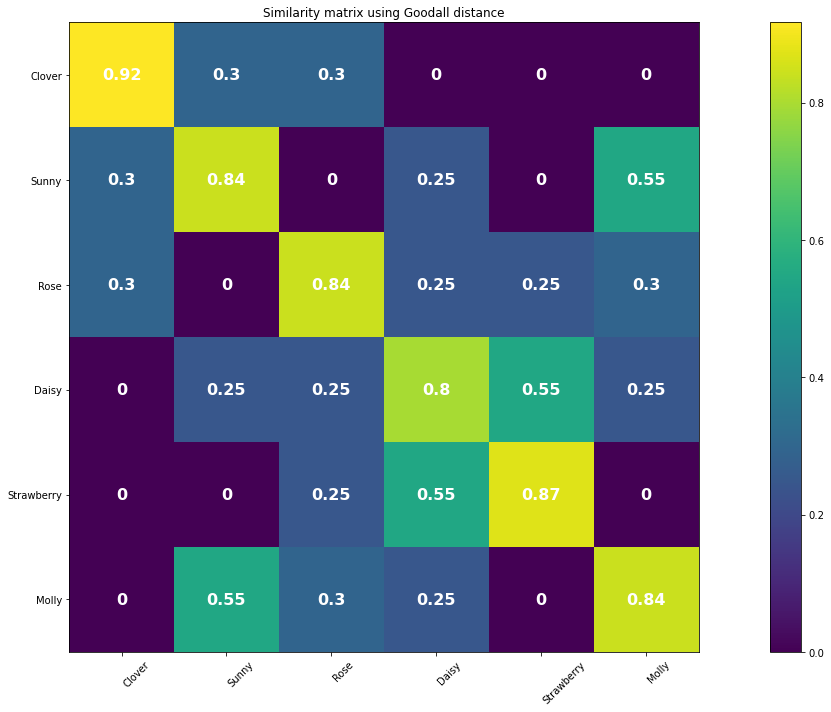

In [48]:
fig, ax = plt.subplots()
im = ax.imshow(S_matrix_Goodall,cmap='viridis')


ax.set_xticks(np.arange(len(cow_indexes)))
ax.set_yticks(np.arange(len(cow_indexes)))

ax.set_xticklabels(cow_indexes)
ax.set_yticklabels(cow_indexes)

plt.setp(ax.get_xticklabels(), rotation=45, ha="left")

for i in range(len(cow_indexes)):
    for j in range(len(cow_indexes)):
        text = ax.text(j, i, round(S_matrix_Goodall[i][j],2),
                       ha="center", va="center", color="w",weight = 'bold',size=16)

ax.set_title("Similarity matrix using Goodall distance")
fig.tight_layout()
plt.colorbar(im)
plt.show()


Here we see the similarity matrix using the goodall measure. A few things to notice:

1) there are a lot of cows that don't have anything in common

2) Eventhough Rose has 1 thing in common with Daisy (calm), and 1 thing in common with Molly (country), Rose is considered more similar to Molly than she is to Daisy. This is because the calm trait is more common, so it is less "unique" to share that trait with another cow, than it is to share the country trait. Similar things apply to the relations of other cows.

3) While not entirely relevant, it is interesting to look at the Goodall score for a cow when compared to itself. We could interpret this score as the "uniqueness" of the cow, the higher the score, the lower the probability of finding a similar cow in a larger group for which this group is representative.

### c) Combine numerical and categorical measures

#### change numerical from distance to similarity

In [49]:
D_max = np.max(D_matrix)
S_matrix_num = [ [0] * 6 for _ in range(6)]

for i in range(len(D_matrix)):
    for j in range(len(D_matrix)):
        S_matrix_num[i][j] = (D_max - D_matrix[i][j])/D_max
        
print(S_matrix_num)

[[1.0, 0.5019828234092526, 0.0, 0.6690941512472374, 0.2398444819581333, 0.1951663178415836], [0.5019828234092526, 1.0, 0.4211283835901432, 0.5971735742436962, 0.32048441901446395, 0.10218676687012858], [0.0, 0.4211283835901432, 1.0, 0.2672385695301854, 0.38789691660916314, 0.08184537491374495], [0.6690941512472374, 0.5971735742436962, 0.2672385695301854, 1.0, 0.5656564107046068, 0.4563875352115712], [0.2398444819581333, 0.32048441901446395, 0.38789691660916314, 0.5656564107046068, 1.0, 0.6939484583045816], [0.1951663178415836, 0.10218676687012858, 0.08184537491374495, 0.4563875352115712, 0.6939484583045816, 1.0]]


#### calculate standard deviations and combine similarities

(note: The goodall distance was used for the similarity graph in the previous exercise, however here I am working with the overlap similarity)

In [50]:
S_matrix_cat = [ [0] * 6 for _ in range(6)]
for e in overlap_i_j:
    S_matrix_cat[int(e[0])][int(e[1])]=e[2]
    S_matrix_cat[int(e[1])][int(e[0])]=e[2]

overlap_DF = pd.DataFrame(data=S_matrix_cat,index=cow_indexes,columns=cow_indexes)
overlap_DF

,Clover,Sunny,Rose,Daisy,Strawberry,Molly
Clover,1.000000,0.333333,0.333333,0.000000,0.000000,0.000000
Sunny,0.333333,1.000000,0.000000,0.333333,0.000000,0.666667
Rose,0.333333,0.000000,1.000000,0.333333,0.333333,0.333333
Daisy,0.000000,0.333333,0.333333,1.000000,0.666667,0.333333
Strawberry,0.000000,0.000000,0.333333,0.666667,1.000000,0.000000
Molly,0.000000,0.666667,0.333333,0.333333,0.000000,1.000000


In [51]:
sigma_num = np.std(S_matrix_num)
sigma_cat = np.std(S_matrix_cat)

S_matrix = [ [0] * 6 for _ in range(6)]

for i in range(len(S_matrix)):
    for j in range(len(S_matrix)):
        S_matrix[i][j] = (2/5)*S_matrix_num[i][j]/sigma_num + (3/5)*S_matrix_cat[i][j]/sigma_cat

print(np.array(S_matrix))

[[3.03164422 1.232229   0.57239886 0.87948924 0.31526302 0.25653591]
 [1.232229   3.03164422 0.55355122 1.35735226 0.42125999 1.27911687]
 [0.57239886 0.55355122 3.03164422 0.92366997 1.08226905 0.67998032]
 [0.87948924 1.35735226 0.92366997 3.03164422 1.88832345 1.17229638]
 [0.31526302 0.42125999 1.08226905 1.88832345 3.03164422 0.91215893]
 [0.25653591 1.27911687 0.67998032 1.17229638 0.91215893 3.03164422]]


Here we see that the similarity measure is larger than 1 for some elements, this is due to the fact that I divide by the standard deviation. It makes more sense for the similarity measure to be in the (0,1) interval, so I normalize again.

#### Normalize combined similarity

In [52]:
S_matrix_norm = (S_matrix - np.min(S_matrix))/(np.max(S_matrix)-np.min(S_matrix))
Similarity_DF = pd.DataFrame(data=S_matrix_norm,index=cow_indexes,columns=cow_indexes)
Similarity_DF

,Clover,Sunny,Rose,Daisy,Strawberry,Molly
Clover,1.000000,0.351587,0.113820,0.224479,0.021162,0.000000
Sunny,0.351587,1.000000,0.107028,0.396675,0.059358,0.368483
Rose,0.113820,0.107028,1.000000,0.240399,0.297550,0.152587
Daisy,0.224479,0.396675,0.240399,1.000000,0.588009,0.329991
Strawberry,0.021162,0.059358,0.297550,0.588009,1.000000,0.236251
Molly,0.000000,0.368483,0.152587,0.329991,0.236251,1.000000


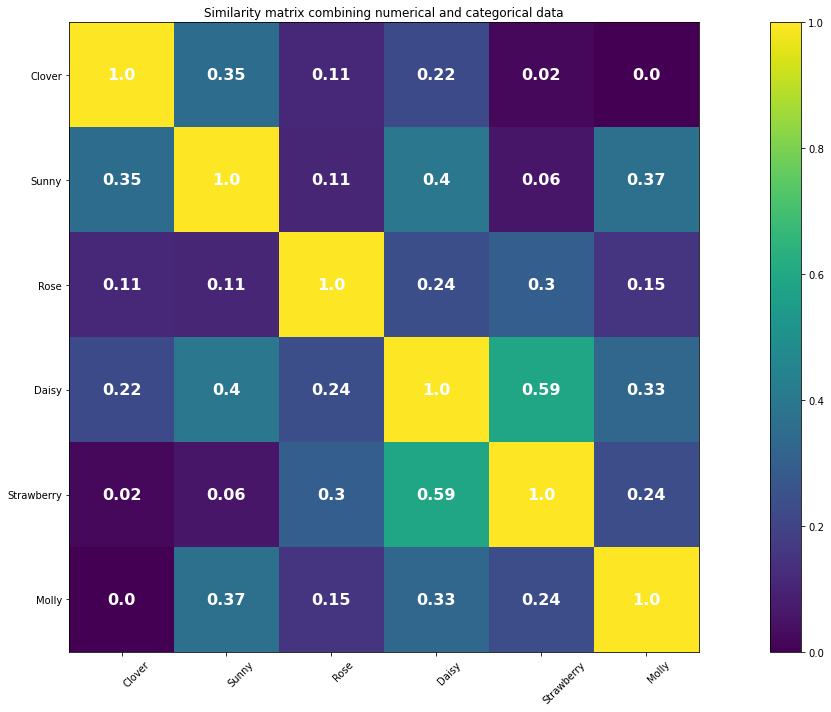

In [53]:
fig, ax = plt.subplots()
im = ax.imshow(S_matrix_norm,cmap='viridis')


ax.set_xticks(np.arange(len(cow_indexes)))
ax.set_yticks(np.arange(len(cow_indexes)))

ax.set_xticklabels(cow_indexes)
ax.set_yticklabels(cow_indexes)

plt.setp(ax.get_xticklabels(), rotation=45, ha="left")

for i in range(len(cow_indexes)):
    for j in range(len(cow_indexes)):
        text = ax.text(j, i, round(S_matrix_norm[i][j],2),
                       ha="center", va="center", color="w",weight = 'bold',size=16)

ax.set_title("Similarity matrix combining numerical and categorical data")
fig.tight_layout()
plt.colorbar(im)
plt.show()

### d) From similarity measure to distance measure

In [54]:
D_matrix_norm = [ [0] * 6 for _ in range(6)]

for i in range(len(D_matrix_norm)):
    for j in range(len(D_matrix_norm)):
        D_matrix_norm[i][j] = 1 - S_matrix_norm[i][j]
        
Distance_DF = pd.DataFrame(data=D_matrix_norm,index=cow_indexes,columns=cow_indexes)
Distance_DF

,Clover,Sunny,Rose,Daisy,Strawberry,Molly
Clover,0.000000,0.648413,0.886180,0.775521,0.978838,1.000000
Sunny,0.648413,0.000000,0.892972,0.603325,0.940642,0.631517
Rose,0.886180,0.892972,0.000000,0.759601,0.702450,0.847413
Daisy,0.775521,0.603325,0.759601,0.000000,0.411991,0.670009
Strawberry,0.978838,0.940642,0.702450,0.411991,0.000000,0.763749
Molly,1.000000,0.631517,0.847413,0.670009,0.763749,0.000000


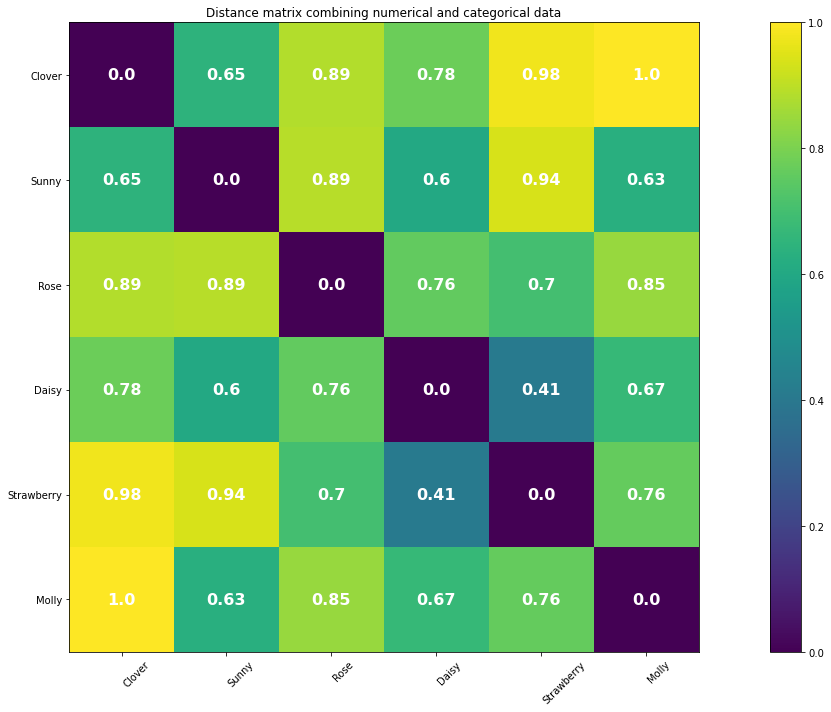

In [55]:
fig, ax = plt.subplots()
im = ax.imshow(D_matrix_norm,cmap='viridis')


ax.set_xticks(np.arange(len(cow_indexes)))
ax.set_yticks(np.arange(len(cow_indexes)))

ax.set_xticklabels(cow_indexes)
ax.set_yticklabels(cow_indexes)

plt.setp(ax.get_xticklabels(), rotation=45, ha="left")

for i in range(len(cow_indexes)):
    for j in range(len(cow_indexes)):
        text = ax.text(j, i, round(D_matrix_norm[i][j],2),
                       ha="center", va="center", color="w",weight = 'bold',size=16)

ax.set_title("Distance matrix combining numerical and categorical data")
fig.tight_layout()
plt.colorbar(im)
plt.show()

#### Is this distance measure a metric?

For this distance measure to be a metric it has to satisfy 4 properties:

##### non negativity: d(x,y) >= 0

One look at the distance matrix tells us that there are no negative distances.

##### coincidence axiom: d(x,y) = 0 <=> x = y

Again, when looking at the matrix, we can see that the distance along the diagonal, this is for each cow the distance to itself, is 0, and it's not 0 for any other distance.

##### symmetry: d(x,y) = d(y,x)

In [56]:
D_is_symmetrical = 1
for i in range(len(cow_indexes)):
    for j in range(len(cow_indexes)):
        if(D_matrix_norm[i][j] != D_matrix_norm[j][i]):
            D_is_symmetrical = 0
if(D_is_symmetrical):
    print('The distance measure is symmetrical!')

The distance measure is symmetrical!


We can see in the matrix that the distance measure is symmetrical, but this little function proves it even if the matrix was too big to see it at first glance.

##### triangle inequality: d(x,z) <= d(x,y)+d(y,z)

The shortest distance between 2 cows that are not the same is 0.41. The second shortest distance is 0.6.

<br>
Case 1: Assume we can take the shortest distance 2 times in a row.
<br>
d(x,y) = d(y,z) = 0.41
<br>
If this is the case, then regardless of if we start at Strawberry or Daisy, we end up at the cow we started with, so:
<br>
d(x,z) = 0
<br>
combining we get:
<br>
0 <= 0.41 + 041
<br>
The inequality is met for Case 1

Case 2 (hypothetical):
<br>
d(x,y) = 0.41 (the shortest distance)
<br>
d(y,z) = 0.6 (case 1 showed we can't use 0.41 again, so we use second shortest distance)
<br>
d(x,z) = 1 (The largest possible direct transition is 1)
<br>
combining we get:
<br>
1 <= 0.41 + 0.6
<br>
The left side of this inequality can only get smaller, the right side can only get bigger, so the inequality is always met.



#### The distance measure satisfies all 4 properties, so it is a metric!

## Exercise 5

In [57]:
A = [[0,1],[-1/2,3/2],[3/2,5/2],[1,3]]
A_DF = pd.DataFrame(data=A)
A_DF

,0,1
0,0.0,1.0
1,-0.5,1.5
2,1.5,2.5
3,1.0,3.0


### a) PCA

#### Mean-center columns of A, to obtain A_m

In [58]:
column_means = []
for j in range(len(A[0])):
    column_sum = 0
    for i in range(len(A)):
        column_sum = column_sum + A[i][j]
    column_mean = column_sum/len(A)
    column_means.append(column_mean)
print('means of columns: '+str(column_means))

A_m = [ [0] * len(A[0]) for _ in range(len(A))]
for j in range(len(A[0])):
    for i in range(len(A)):
        A_m[i][j] = A[i][j] - column_means[j]
A_m_DF = pd.DataFrame(data=A_m)
A_m_DF

means of columns: [0.5, 2.0]


,0,1
0,-0.5,-1.0
1,-1.0,-0.5
2,1.0,0.5
3,0.5,1.0


##### validity check: is A_m x mean-centered for an arbitrary unit vector?

In [59]:
import math

x1 = [1,0]
x2 = [0,1]
x3 = [math.cos(math.pi/4),math.cos(math.pi/4)]

A_mx1 = np.matmul(A_m,x1)
A_mx2 = np.matmul(A_m,x2)
A_mx3 = np.matmul(A_m,x3)

print(A_mx1)
print(A_mx2)
print(A_mx3)

sum_A_mx1 = 0
sum_A_mx2 = 0
sum_A_mx3 = 0

for i in range(len(A_mx1)):
    sum_A_mx1 = sum_A_mx1 + A_mx1[i]
    sum_A_mx2 = sum_A_mx2 + A_mx2[i]
    sum_A_mx3 = sum_A_mx3 + A_mx3[i]
    
mean_A_mx1 = sum_A_mx1/len(A_mx1)
mean_A_mx2 = sum_A_mx2/len(A_mx2)
mean_A_mx3 = sum_A_mx3/len(A_mx3)

print(mean_A_mx1)
print(mean_A_mx2)
print(mean_A_mx3)

[-0.5 -1.   1.   0.5]
[-1.  -0.5  0.5  1. ]
[-1.06066017 -1.06066017  1.06066017  1.06066017]
0.0
0.0
0.0


Yes, it seems that A_mx is indeed mean-centered for an arbitrary unit vector x.

#### Compute empirical covariance matrix

In [60]:
A_m = np.array(A_m)

C = [ [0] * len(A[0]) for _ in range(len(A[0]))]

for i in range(len(A_m[0])):
    for j in range(len(A_m[0])):
        for k in range(len(A_m)):
                C[i][j]= C[i][j] + (1/(len(A_m)-1))*A_m[k][i]*A_m[k][j]
print(C)

[[0.8333333333333334, 0.6666666666666666], [0.6666666666666666, 0.8333333333333333]]


##### validity check: compute covariance matrix using library:

In [61]:
print('NumPy covariance matrix: \n%s' %np.cov(A_m.T))

NumPy covariance matrix: 
[[0.83333333 0.66666667]
 [0.66666667 0.83333333]]


They are the same, so we computed the covariance matrix correctly!

#### Compute eigendecomposition

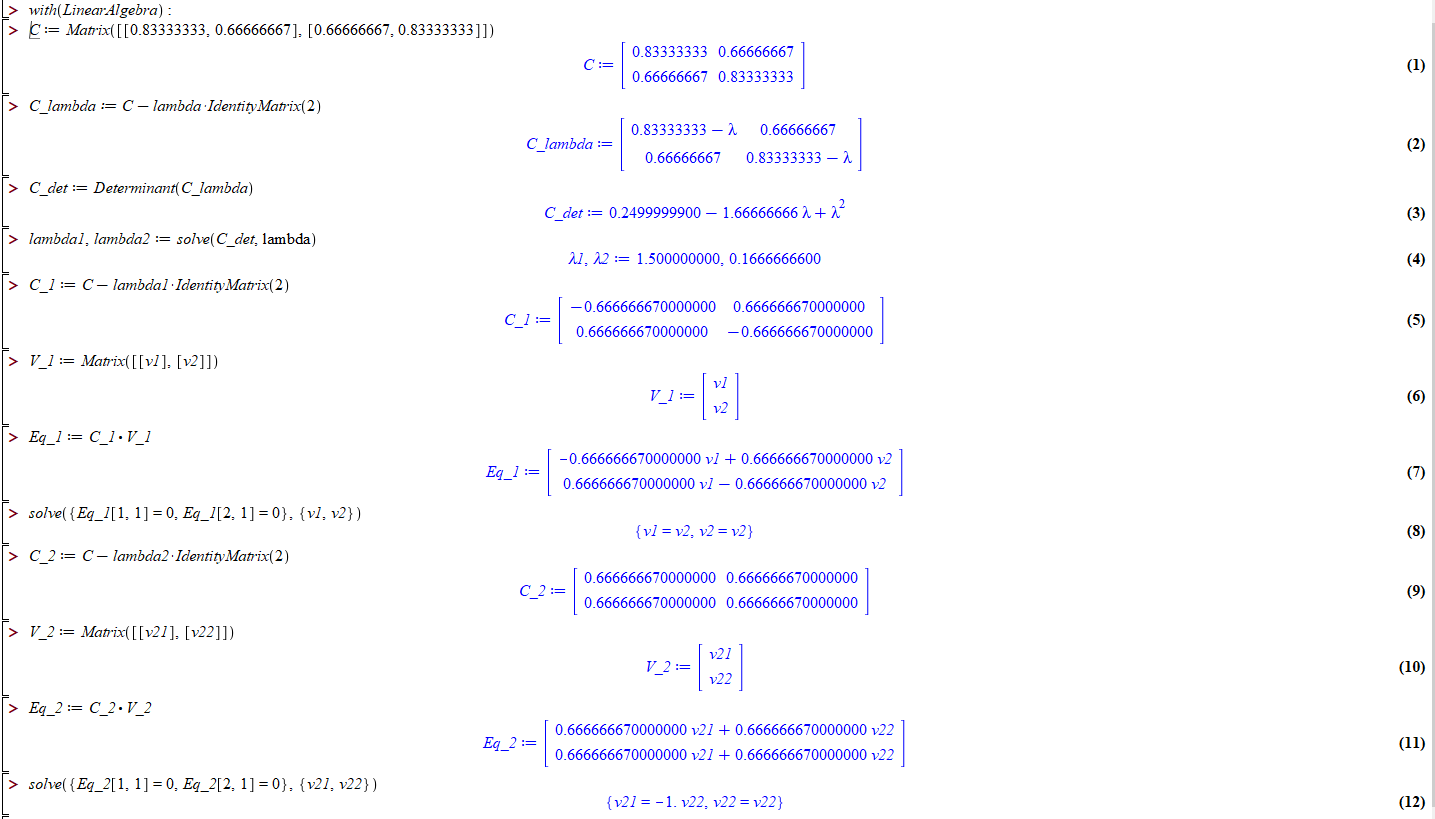

I used maple to do the calculations. For the eigenvalues I got lamba1 = 1.5 and lambda2 = 0.166... The results are that for the 1st eigenvector v1=v2. A vector that fits this is [1,1]. For the 2nd eigenvector v1 = -v2. A vector that fits this is [-1,1]. The normalized version of these vectors are [0.7,0.7] and [-0.7,0.7]. Eigenvectors like this indicate that the principle components are a 45 degree rotation of the x and y axis.

##### validity check: compute eigenvectors and eigenvalues using library.

In [62]:
eig_vals, eig_vecs = np.linalg.eig(C)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvalues 
[1.5        0.16666667]


We see that the first column of eigenvectors, and thus the first eigenvector, corresponding to eigenvalue 1.5, is [0.7,0.7]. This is the normalized version of the [1,1] we calculated manually. Same goes for [-0.7,07]. We can conclude that our manual calculation was correct

##### 2nd validity check: VΛV.T = C

In [63]:
eig_val_matrix = [[eig_vals[0], 0],[0, eig_vals[1]]]

test = np.matmul(np.matmul(eig_vecs,eig_val_matrix),eig_vecs.T)
print(test)
print(np.matrix(C))

[[0.83333333 0.66666667]
 [0.66666667 0.83333333]]
[[0.83333333 0.66666667]
 [0.66666667 0.83333333]]


2nd check also passed!

#### product of Ã V_k 

In [64]:
projection = np.matmul(A_m,eig_vecs)
print(projection)

[[-1.06066017 -0.35355339]
 [-1.06066017  0.35355339]
 [ 1.06066017 -0.35355339]
 [ 1.06066017  0.35355339]]


##### validity check: compute PCA using library

In [65]:
from sklearn.decomposition import PCA
projection_test = PCA().fit_transform(A)
print(projection_test)

[[ 1.06066017 -0.35355339]
 [ 1.06066017  0.35355339]
 [-1.06066017 -0.35355339]
 [-1.06066017  0.35355339]]


Eventhough the the first column is the opposite sign for the library generated projection compared to our projection, both are correct. When I solved for the 1st eigenvector, I got the condition v1 = v2. I chose [1,1], and the eig_vectors I got from the library function (normalized) were [0.7,0.7]. However, I could've chosen [-0.7,-0.7], and the condition v1=v2 would still hold. If I chose that, the result would've been the projection I got from the library: 

In [66]:
eig_vecs_equivalent = [[-eig_vecs[0][0],eig_vecs[0][1]],[-eig_vecs[1][0],eig_vecs[1][1]]]
print(np.matrix(eig_vecs_equivalent))

projection = np.matmul(A_m,eig_vecs_equivalent)
print(projection)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[[ 1.06066017 -0.35355339]
 [ 1.06066017  0.35355339]
 [-1.06066017 -0.35355339]
 [-1.06066017  0.35355339]]


Here we see that if I would've chosen negative values for the 1st eigenvector, which is allowed because the outcome was v1=v2, so they can both be negative, I would've gotten the same projection straight away.

### b) Consider resulting decomposition

#### i. 1-dimensional representation, such that the variance of the resulting data is equal to the largest eigenvalue

We use the 1st eigenvector, corresponding to the largest eigenvalue, to project the original data. The eigenvalue by definition is the variance of the data projected along this dimension.

In [67]:
D1_projection = np.matmul(A,eig_vecs[:,0])
print(D1_projection)

sum_D1 = 0
for i in range(len(D1_projection)):
    sum_D1 = sum_D1 + D1_projection[i]
mean_D1 = sum_D1/len(D1_projection)

variance_D1 = 0
for i in range(len(D1_projection)):
    variance_D1 = variance_D1 + ((D1_projection[i]-mean_D1)**2)/(len(D1_projection)-1)
print(variance_D1)

[0.70710678 0.70710678 2.82842712 2.82842712]
1.4999999999999998


##### validity check:

In [68]:
D1_DF = pd.DataFrame(D1_projection)
print(D1_DF.std()**2)

0    1.5
dtype: float64


#### ii. 2-dimensional representation, such that the variance of one of the columns is equal to the smallest eigenvalue.

In [69]:
D2_projection = np.matmul(A,eig_vecs)
print(D2_projection)
D2_DF = pd.DataFrame(D2_projection)
print(D2_DF.std()**2)

[[0.70710678 0.70710678]
 [0.70710678 1.41421356]
 [2.82842712 0.70710678]
 [2.82842712 1.41421356]]
0    1.500000
1    0.166667
dtype: float64


The variance of the second column is equal to the smalles eigenvalue. Again, by definition the eigenvalues are the variance of the data projected along the dimension demonstrated by the corresponding eigenvector.

##### validity check:

In [70]:
D2_DF = pd.DataFrame(D2_projection)
print(D2_DF.std()**2)

0    1.500000
1    0.166667
dtype: float64


2nd column has variance 0.166667, equal to the smallest eigenvalue! check passed!

### c) Compute distances between 2 points in d-dimensional Euclidean space

#### Euclidean distance function

In [71]:
def Euclidean_distance_1D(x,y):
    return np.abs((x-y))

def Euclidean_distance_nD(x,y):
    temp_distance = 0
    if(len(x) != len(y)):
        print("conflicting dimensions")
        return 0
    else:
        for i in range(len(x)):
            temp_distance = temp_distance + (x[i]-y[i])**2
        distance = np.sqrt(temp_distance)
        return distance

#### i. Compute the Euclidean distance between all pairs of points in the original data set.

In [72]:
Distance_matrix_1 = [ [0] * len(A) for _ in range(len(A))]

for i in range(len(A)):
    for j in range(len(A)):
        Distance_matrix_1[i][j] = Euclidean_distance_nD(A[i],A[j])
print(np.matrix(Distance_matrix_1))

[[0.         0.70710678 2.12132034 2.23606798]
 [0.70710678 0.         2.23606798 2.12132034]
 [2.12132034 2.23606798 0.         0.70710678]
 [2.23606798 2.12132034 0.70710678 0.        ]]


#### ii. Compute the Euclidean distance between all pairs of points in the 1-dimensional representation obtained in exercise 5b

In [73]:
Distance_matrix_2 = [ [0] * len(D1_projection) for _ in range(len(D1_projection))]

for i in range(len(D1_projection)):
    for j in range(len(D1_projection)):
        Distance_matrix_2[i][j] = Euclidean_distance_1D(D1_projection[i],D1_projection[j])
print(np.matrix(Distance_matrix_2))

[[0.         0.         2.12132034 2.12132034]
 [0.         0.         2.12132034 2.12132034]
 [2.12132034 2.12132034 0.         0.        ]
 [2.12132034 2.12132034 0.         0.        ]]


#### iii. Compute the Euclidean distance between all pairs of points in the 2-dimensional representation obtained in exercise 5b

In [74]:
Distance_matrix_3 = [ [0] * len(D2_projection) for _ in range(len(D2_projection))]

for i in range(len(D2_projection)):
    for j in range(len(D2_projection)):
        Distance_matrix_3[i][j] = Euclidean_distance_nD(D2_projection[i],D2_projection[j])
print(np.matrix(Distance_matrix_3))

[[0.         0.70710678 2.12132034 2.23606798]
 [0.70710678 0.         2.23606798 2.12132034]
 [2.12132034 2.23606798 0.         0.70710678]
 [2.23606798 2.12132034 0.70710678 0.        ]]


#### iv.What is the effect of the previous transformations on these distances?

##### for ii)

When we take a look at the Euclidean distances before the transformations, we can see a patern. The points form a rectangle, and there are 3 distances: the small side: 0.7, the long side: 2.12, and the diagonal: 2.24.

After performing the 1D projection, we see that points on the 'same' side of the long side are now 0 euclidean distance from each other, while points on the 'opposite' side are 2.12, the long side distance, euclidean distance from each other. This makes sense, because we projected along the dimension in which the long distance is directed, so we lost the small side dimension. That is why the small side distance is now 0, and the diagonal is equal to the long side. 

##### for iii)

We could see this as transforming the axes while the points stay at the same place. Since the points don't move, and the euclidean distance is unaffected by the rotation of the axis, the relational distance between the points stays the same.

### d) Repeat 5a and 5b for the following data set:

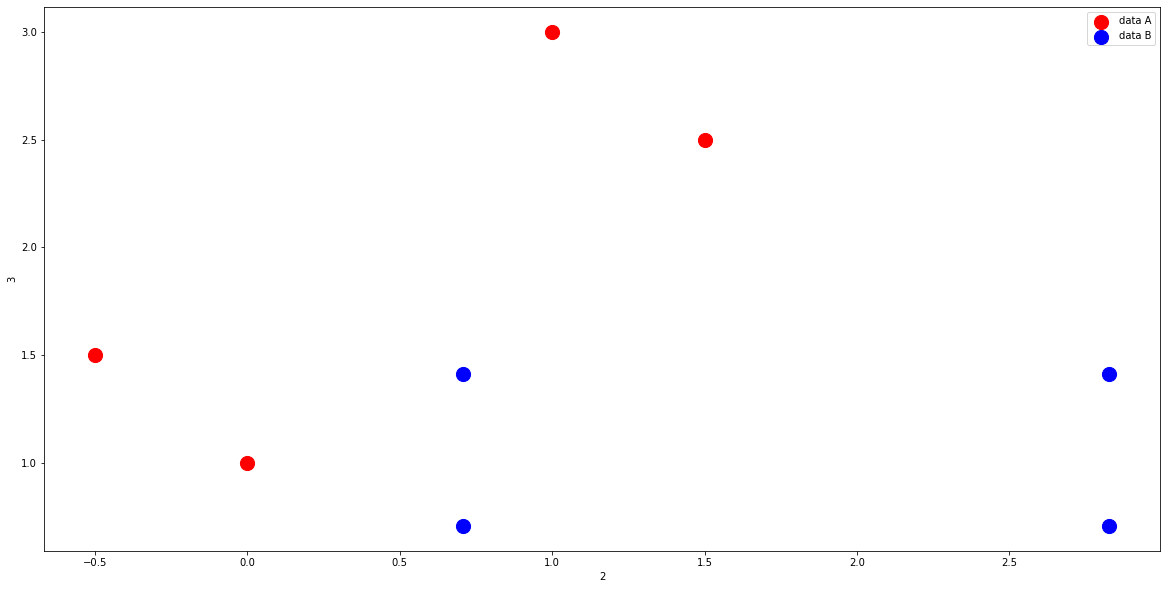

In [75]:
B = [[np.sqrt(1/2),np.sqrt(1/2)],[np.sqrt(1/2),2*np.sqrt(1/2)],[4*np.sqrt(1/2),np.sqrt(1/2)],[4*np.sqrt(1/2),2*np.sqrt(1/2)]]
B_DF = pd.DataFrame(data=B,columns=[2,3])

C_DF = pd.concat([A_DF,B_DF],axis=1)


ax = C_DF.plot.scatter(x=0, y=1, s=200, c='red', label='data A');
C_DF.plot.scatter(x=2, y=3, s=200, c='blue', label='data B', ax=ax);

From the plot we can already notice that data B is a rotation and translation of data A.

### d-a) PCA

#### Mean-center columns of B, to obtain B_m

In [76]:
column_means = []
for j in range(len(B[0])):
    column_sum = 0
    for i in range(len(B)):
        column_sum = column_sum + B[i][j]
    column_mean = column_sum/len(B)
    column_means.append(column_mean)
print('means of columns: '+str(column_means))
B_m = [ [0] * len(A[0]) for _ in range(len(A))]
for j in range(len(A[0])):
    for i in range(len(A)):
        B_m[i][j] = B[i][j] - column_means[j]
B_m_DF = pd.DataFrame(data=B_m)
B_m_DF

means of columns: [1.7677669529663689, 1.0606601717798214]


,0,1
0,-1.06066,-0.353553
1,-1.06066,0.353553
2,1.06066,-0.353553
3,1.06066,0.353553


We can see that the means are different from those of A. This makes sense, because B is a rotated and translated version of A.

#### Compute empirical covariance matrix

In [77]:
B_m = np.array(B_m)

C_B = [ [0] * len(B[0]) for _ in range(len(B[0]))]

for i in range(len(B_m[0])):
    for j in range(len(B_m[0])):
        for k in range(len(B_m)):
                C_B[i][j]= C_B[i][j] + (1/(len(B_m)-1))*B_m[k][i]*B_m[k][j]
print(C_B)

[[1.5000000000000002, 0.0], [0.0, 0.16666666666666669]]


The covariance matrix is different as well, because it represents how the data is spread out along the x and y axes. Since B is a rotated version of A, ofcourse the spread across the x and y axes will be different.

An interesting thing to notice here, is that the values in the covariance matrix are equal to its eigenvalues. The reason for this is that the data is already oriented along its principle components, since the x-axis and y-axis are principle components for data set B, which is clear by the fact that the eigenvectors are [1,0] and [0,1].

#### Compute eigendecomposition

In [78]:
eig_vals_B, eig_vecs_B = np.linalg.eig(C_B)
print('Eigenvectors \n%s' %eig_vecs_B)
print('\nEigenvalues \n%s' %eig_vals_B)

Eigenvectors 
[[1. 0.]
 [0. 1.]]

Eigenvalues 
[1.5        0.16666667]


We see that the eigenvalues are the same, but the eigenvectors are different. It makes sense for the eigenvectors to be different, since B is a rotated version of A, so the data is spread out among different directions. It also makes sense for the eigenvalues to be the same, since the scale of A and B is the same, so the data is equally spread along their respective eigenvectors.

#### product of B_m V_k 

In [79]:
projection_B = np.matmul(B_m,eig_vecs_B)
print(projection)

[[ 1.06066017 -0.35355339]
 [ 1.06066017  0.35355339]
 [-1.06066017 -0.35355339]
 [-1.06066017  0.35355339]]


##### validity check: compute PCA using library

In [80]:
from sklearn.decomposition import PCA
projection_test_B = PCA().fit_transform(B)
print(projection_test_B)

[[ 1.06066017  0.35355339]
 [ 1.06066017 -0.35355339]
 [-1.06066017  0.35355339]
 [-1.06066017 -0.35355339]]


We see that the coordinates of the data along their respective PC's is the same. This also makes sense, since the result of PCA doesn't care about translation or rotation, because it is calculated in the mean-centering and eigen vectors respectively. Ofcourse if we would look at how much each original axis contributed to the each PC, so look at what the PC's of each data set actually are, we would see a difference for both data sets. It is clear that data set B has the x-axis as its first principle component, and the y-axis as its second principle component. For data set A, the principle components are a 45 degree rotation for the x and y axis, which is clear from the [1,1] and [1,-1] eigenvectors.

### d-b) Consider resulting decomposition

#### i. 1-dimensional representation, such that the variance of the resulting data is equal to the largest eigenvalue

In [81]:
D1_projection_B = np.matmul(B,eig_vecs_B[:,0])
print(D1_projection_B)

sum_D1_B = 0
for i in range(len(D1_projection_B)):
    sum_D1_B = sum_D1_B + D1_projection_B[i]
mean_D1_B = sum_D1_B/len(D1_projection_B)
variance_D1_B = 0
for i in range(len(D1_projection_B)):
    variance_D1_B = variance_D1_B + ((D1_projection_B[i]-mean_D1_B)**2)/(len(D1_projection_B)-1)
print(variance_D1_B)

[0.70710678 0.70710678 2.82842712 2.82842712]
1.5000000000000002


The result of this projection is the same. Again this makes sense, this is like plotting the value along their 1st principle component, which I already demonstrated is the same.

##### validity check:

In [82]:
D1_DF_B = pd.DataFrame(D1_projection_B)
print(D1_DF_B.std()**2)

0    1.5
dtype: float64


#### ii. 2-dimensional representation, such that the variance of one of the columns is equal to the smallest eigenvalue.

In [83]:
D2_projection_B = np.matmul(B,eig_vecs_B)
print(D2_projection_B)

[[0.70710678 0.70710678]
 [0.70710678 1.41421356]
 [2.82842712 0.70710678]
 [2.82842712 1.41421356]]


Again, the result of the projection is the same. This is like plotting along the (first 2) principle components, which looks the same for both data sets.

##### validity check:

In [84]:
D2_DF_B = pd.DataFrame(D2_projection_B)
print(D2_DF_B.std()**2)

0    1.500000
1    0.166667
dtype: float64
